# Business Understanding

- This Project analyzes the Aviation Accident Database from the National Transportation Safety Board which includes accident data from 1962-2023.
- We are determining if the Personal and Public airline industry is a viable business option for expansion.   
- Analysis shows that while all planes crash, certain Models are safer and therefore reduce liability and risk.  Analysis of Weather, severity of damage to the plane, phase of flight, and total fatal injuries can be used to determine the best options for the business.

# Data Understanding

- This Project analyzes the Aviation Accident Database from the National Transportation Safety Board which includes accident data from 1962-2023.
- The CSV file was donwloaded from Kaggle.  This is a public website with various datasets.  This is effectively all US crash data since the 60's.
- There are 88889 entries with 30 different attributes for each entry.  Attributes include Make and Model of plane, purpose of flight, aircraft damage, location of crash, and arcraft damage to name a few.

# Data Preperation

In [1]:
# import libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#loading the AviationData.csv file
# using encoding 'Latin-1' to handle values
df = pd.read_csv('data/AviationData.csv',
                 encoding='Latin-1',
                 low_memory=False,
                 dtype=str)  
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#determining shape of dataset
df.shape

(88889, 31)

In [4]:
#examinig null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50249 non-null  object
 9   Airport.Name            52790 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87572 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

In [5]:
#setting Event.Id as index
df = pd.read_csv('data/AviationData.csv', index_col = 0,
                 encoding='Latin-1',
                 low_memory=False,
                 dtype=str)
df

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,...,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29-12-2022
20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,...,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27-12-2022


In [6]:
# Calculating NaN values sum for each column
df.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

In [7]:
#Removing whitespaces from column names
df.columns = df.columns.str.strip()

In [8]:
#checking how many aircrafts are Airplanes
(df['Aircraft.Category'] == 'Airplane').value_counts()

False    61272
True     27617
Name: Aircraft.Category, dtype: int64

In [9]:
# Keeping only rows where the Aircraft is an Airplane.  
# Creating a new df where Aircraft.Category is equal to Airplane and reassigning it df
df= df[df['Aircraft.Category'] == 'Airplane']
# Pulling series to briefly spot check Aircraft.Category column
df['Aircraft.Category']

Event.Id
20170710X52551    Airplane
20020909X01562    Airplane
20020909X01561    Airplane
20020917X02148    Airplane
20020917X02134    Airplane
                    ...   
20221213106455    Airplane
20221215106463    Airplane
20221219106475    Airplane
20221219106470    Airplane
20221227106497    Airplane
Name: Aircraft.Category, Length: 27617, dtype: object

In [10]:
#keeping rows where the Airplanes are NOT built by amateurs
df = df[df['Amateur.Built'] =='No']

df['Amateur.Built']

Event.Id
20170710X52551    No
20020909X01562    No
20020909X01561    No
20020917X02148    No
20020917X02134    No
                  ..
20221213106455    No
20221215106463    No
20221219106475    No
20221219106470    No
20221227106497    No
Name: Amateur.Built, Length: 24417, dtype: object

In [11]:
# Determining value type
type(df['Total.Fatal.Injuries'][0])

float

In [12]:
# Quick spot check to identify NaN value
df['Total.Fatal.Injuries']

Event.Id
20170710X52551    NaN
20020909X01562      0
20020909X01561      0
20020917X02148      0
20020917X02134      1
                 ... 
20221213106455      0
20221215106463      0
20221219106475      0
20221219106470      0
20221227106497      0
Name: Total.Fatal.Injuries, Length: 24417, dtype: object

In [13]:
# Imputing Fatality values from Injury Severity Column
# Using a for loop to iterate over each row to make 'Total.Fatal Injury' value 0 if NaN when Injury.Severity is Non-Fatal
for index, row in df.iterrows():
    if row['Injury.Severity'] == 'Non-Fatal' and pd.isnull(row['Total.Fatal.Injuries']):
        df.at[index, 'Total.Fatal.Injuries'] = 0

In [14]:
# Spot Check
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,...,NaN,Air Canada,0,NaN,1,44,VMC,Climb,Probable Cause,19-09-2017
20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,...,Personal,NaN,0,0,0,2,VMC,Takeoff,Probable Cause,01-01-1982
20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,...,Business,NaN,0,0,0,2,IMC,Landing,Probable Cause,01-01-1982
20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,0,1,0,IMC,Cruise,Probable Cause,02-01-1983
20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,Fatal(1),...,Personal,NaN,1,0,0,0,IMC,Takeoff,Probable Cause,02-01-1983


In [15]:
# Checking NaN values by counting sum of isna() for each column
nan_values = df.isna()

nan_counts = nan_values.sum()

nan_counts

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      6
Country                       7
Latitude                   5246
Longitude                  5252
Airport.Code               8843
Airport.Name               8405
Injury.Severity             813
Aircraft.damage            1270
Aircraft.Category             0
Registration.Number         203
Make                          3
Model                        18
Amateur.Built                 0
Number.of.Engines          2551
Engine.Type                3956
FAR.Description             480
Schedule                  21481
Purpose.of.flight          3683
Air.carrier               14061
Total.Fatal.Injuries        126
Total.Serious.Injuries     2846
Total.Minor.Injuries       2562
Total.Uninjured             718
Weather.Condition          2979
Broad.phase.of.flight     18621
Report.Status              4662
Publication.Date            957
dtype: int64

In [16]:
# Create a boolean mask for rows with NaN values in 'Total.Fatal.Injuries'
mask_nan_values = df['Total.Fatal.Injuries'].isna()

# Use the boolean mask to select the rows with NaN values
rows_with_nan = df[mask_nan_values]

# Display the rows with NaN values
rows_with_nan


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20020917X02151,Incident,FTW82IA062,1982-02-19,"HARLINGEN, TX",United States,NaN,NaN,HRL,HARLINGEN IND.AIR PARK,Incident,...,NaN,Mexicana Airlines,NaN,NaN,NaN,83,IMC,Landing,Probable Cause,04-12-2014
20020917X03106,Incident,DCA82IA021,1982-05-12,"FT. MYER, FL",United States,NaN,NaN,NaN,NaN,Incident,...,Business,NaN,NaN,NaN,NaN,3,VMC,Climb,Probable Cause,01-02-2016
20020917X04065,Incident,NYC82IA137,1982-07-05,"FLUSHING, NY",United States,NaN,NaN,LGA,LAGUARDIA,Incident,...,NaN,Air Canada,NaN,NaN,NaN,74,VMC,Climb,Probable Cause,04-12-2014
20020917X04216,Incident,ANC82IA095,1982-09-21,"NEAR DILLINGHAM, AK",United States,NaN,NaN,NaN,NaN,Incident,...,Unknown,Yute Air Alaska Inc.,NaN,NaN,NaN,5,VMC,Climb,Probable Cause,08-11-2012
20001214X42478,Incident,LAX83IA149B,1983-03-18,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES INTL,Incident,...,Unknown,NaN,NaN,NaN,NaN,588,VMC,Standing,Probable Cause,04-12-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090303X93946,Incident,CEN09RA185,2007-11-05,"Mandarfrn, Austria",Austria,46.958056,10.841944,NaN,NaN,Incident,...,External Load,NaN,NaN,NaN,1,1,VMC,NaN,Foreign,01-04-2009
20121004X53806,Incident,ERA13IA006,2007-11-09,NaN,Unknown,46.573056,-37.768334,NaN,NaN,Incident,...,Public Aircraft - Federal,NaN,NaN,NaN,NaN,6,IMC,Maneuvering,Probable Cause,30-05-2013
20071231X02010,Incident,ENG08IA002,2007-11-17,"Greenville, TX",United States,33.191111,-95.978334,DAL,Love Field,Incident,...,NaN,Southwest Airlines,NaN,NaN,NaN,138,VMC,Climb,Probable Cause,22-06-2009


In [17]:
# Spot Check NaN values are removed
df['Total.Fatal.Injuries']

Event.Id
20170710X52551    0
20020909X01562    0
20020909X01561    0
20020917X02148    0
20020917X02134    1
                 ..
20221213106455    0
20221215106463    0
20221219106475    0
20221219106470    0
20221227106497    0
Name: Total.Fatal.Injuries, Length: 24417, dtype: object

In [18]:
df.shape

(24417, 30)

In [19]:
# null value check
# df.isna().sum()

In [20]:
# Removing all accidents that happened prior to 1985 since avg lifespan of a plan is 25 years
# Converting 'Event.Date' to datetime format for easy manipulation
# Using .loc to avoid SettingwithCopyWarning 
df['Event.Date'] = pd.to_datetime(df.loc[:, 'Event.Date'])
mask = df['Event.Date'].dt.year >=1985
df_current = df.loc[mask]
df_current

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001214X35509,Accident,DEN85LA064,1985-01-14,"WAPITI, WY",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,1,1,NaN,VMC,Maneuvering,Probable Cause,12-01-2016
20001214X36510,Accident,LAX85LA257,1985-05-13,"MESA, AZ",United States,NaN,NaN,FFZ,FALCON FLD.,Non-Fatal,...,Positioning,NaN,0,1,NaN,NaN,VMC,Approach,Probable Cause,03-08-2011
20001214X36887,Accident,NYC85FA145B,1985-06-11,"BELMAR, NJ",United States,NaN,NaN,BLM,BELMAR MONMOUTH CO.,Fatal(1),...,Instructional,NaN,1,1,4,NaN,VMC,Takeoff,Probable Cause,08-04-2013
20001214X37274,Accident,NYC85LA188,1985-07-21,"SIDNEY, ME",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,NaN,NaN,4,VMC,Takeoff,Probable Cause,01-02-2016
20001214X37356,Incident,ATL85IA251,1985-08-16,"HILTON HEAD, SC",United States,NaN,NaN,49J,HILTON HEAD,Incident,...,Business,NaN,NaN,NaN,NaN,4,VMC,Landing,Probable Cause,26-07-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,Non-Fatal,...,NaN,NaN,0,0,0,1,NaN,NaN,NaN,14-12-2022
20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,...,Personal,SKY WEST AVIATION INC TRUSTEE,0,0,0,1,VMC,NaN,NaN,27-12-2022
20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,...,NaN,NaN,0,0,0,1,NaN,NaN,NaN,19-12-2022


In [21]:
# Checking my code
df_1985 = df_current.copy()
df_1985['Event.Date'] = pd.to_datetime(df_1985.loc[:, 'Event.Date'])
num_rows_before_1985 = (df_1985['Event.Date'].dt.year < 1985).sum()
print("Number of rows with a date before 1985:", num_rows_before_1985)


Number of rows with a date before 1985: 0


In [22]:
# Confirming 'Event.Date' is in Datetime
type(df_1985['Event.Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
# Determining all unique values for 'Aircraft.Damage'
df_1985['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', nan, 'Minor', 'Unknown'], dtype=object)

In [24]:
# Imputing 'Aircraft.Damage' value
df_1985['Total.Uninjured'] = pd.to_numeric(df_1985['Total.Uninjured'], errors='coerce')
condition = df_1985['Total.Uninjured'] >= 1
df_1985.loc[condition, 'Aircraft.damage'] = 'Minor'

In [25]:
# Removes all rows where 'Total.Fatal.Injuries' is NaN
df_1985 = df_1985.dropna(subset=['Total.Fatal.Injuries'], axis=0)
# Ensuring all values in the 'Total.Fatal.Injuries' column are integers
df_1985['Total.Fatal.Injuries'] = df_1985['Total.Fatal.Injuries'].astype(int)

In [26]:
# Calculating the mean of 'Total.Fatal.Injuries for each accident'
df_1985['Total.Fatal.Injuries'].mean()

0.6491812508797448

In [27]:
# Removing all rows with NaN in the 'Make' and 'Model columns'
df_1985 = df_1985.dropna(subset=['Make', 'Model'])

In [28]:
# Checking how many unique 'Model' values there are
df_1985['Model'].nunique()

3514

In [29]:
#df_1985.shape

(21297, 30)

In [30]:
# Cleaning up 'Model' values to reduce redundancy
df_1985.loc[df_1985['Model'] == '108 3', 'Model'] = '108-3'
df_1985.loc[df_1985['Model'] == '100 180', 'Model'] = '100-180'
df_1985.loc[df_1985['Model'] == '108 1', 'Model'] = '108-1'
df_1985.loc[df_1985['Model'] == '114 B', 'Model'] = '114-B'
df_1985.loc[df_1985['Model'] == '114B', 'Model'] = '114-B'
df_1985.loc[df_1985['Model'] == '14 19', 'Model'] = '14-19'
df_1985.loc[df_1985['Model'] == '150 - F', 'Model'] = '150-F'
df_1985.loc[df_1985['Model'] == '150 - G', 'Model'] = '150-G'
df_1985.loc[df_1985['Model'] == '164B', 'Model'] = '164-B'
df_1985.loc[df_1985['Model'] == '17 30', 'Model'] = '17-30'
df_1985.loc[df_1985['Model'] == '17 30A', 'Model'] = '17-30A'
df_1985.loc[df_1985['Model'] == '17 31A', 'Model'] = '17-31A'
df_1985.loc[df_1985['Model'] == '17 30', 'Model'] = '17-30'
df_1985.loc[df_1985['Model'] == '170 B', 'Model'] = '170-B'
df_1985.loc[df_1985['Model'] == '170 - B', 'Model'] = '170-B'
df_1985.loc[df_1985['Model'] == '170B', 'Model'] = '170-B'
df_1985.loc[df_1985['Model'] == '172 M', 'Model'] = '172-M'
df_1985.loc[df_1985['Model'] == '172 - M', 'Model'] = '172-M'
df_1985.loc[df_1985['Model'] == '172M', 'Model'] = '172-M'
df_1985.loc[df_1985['Model'] == '172P', 'Model'] = '172-P'
df_1985.loc[df_1985['Model'] == '172 P', 'Model'] = '172-P'
df_1985.loc[df_1985['Model'] == '172N', 'Model'] = '172-N'
df_1985.loc[df_1985['Model'] == '172 N', 'Model'] = '172-N'
df_1985.loc[df_1985['Model'] == '172A', 'Model'] = '172-A'
df_1985.loc[df_1985['Model'] == '172 A', 'Model'] = '172-A'
df_1985.loc[df_1985['Model'] == '172S', 'Model'] = '172-S'
df_1985.loc[df_1985['Model'] == '172 S', 'Model'] = '172-S'
df_1985.loc[df_1985['Model'] == '172F', 'Model'] = '172-F'
df_1985.loc[df_1985['Model'] == '172 - F', 'Model'] = '172-F'
df_1985.loc[df_1985['Model'] == '172 - H', 'Model'] = '172-H'
df_1985.loc[df_1985['Model'] == '172H', 'Model'] = '172-H'
df_1985.loc[df_1985['Model'] == '172 - S', 'Model'] = '172-S'
df_1985.loc[df_1985['Model'] == '172 - P', 'Model'] = '172-P'
df_1985.loc[df_1985['Model'] == '172 - N', 'Model'] = '172-N'
df_1985.loc[df_1985['Model'] == '172 K', 'Model'] = '172-K'
df_1985.loc[df_1985['Model'] == '172K', 'Model'] = '172-K'
df_1985.loc[df_1985['Model'] == '172 - R', 'Model'] = '172-R'
df_1985.loc[df_1985['Model'] == '172R', 'Model'] = '172-R'
df_1985.loc[df_1985['Model'] == '172RG', 'Model'] = '172-RG'
df_1985.loc[df_1985['Model'] == '172 RG', 'Model'] = '172-RG'
df_1985.loc[df_1985['Model'] == '172SP', 'Model'] = '172-SP'
df_1985.loc[df_1985['Model'] == '172 SP', 'Model'] = '172-SP'
df_1985.loc[df_1985['Model'] == '1730A', 'Model'] = '1730-A'
df_1985.loc[df_1985['Model'] == '1730 - A', 'Model'] = '1730-A'
df_1985.loc[df_1985['Model'] == '172B', 'Model'] = '172-B'
df_1985.loc[df_1985['Model'] == '172C', 'Model'] = '172-C'
df_1985.loc[df_1985['Model'] == '172D', 'Model'] = '172-D'
df_1985.loc[df_1985['Model'] == '172E', 'Model'] = '172-E'
df_1985.loc[df_1985['Model'] == '172G', 'Model'] = '172-G'
df_1985.loc[df_1985['Model'] == '172I', 'Model'] = '172-I'
df_1985.loc[df_1985['Model'] == '172L', 'Model'] = '172-L'
df_1985.loc[df_1985['Model'] == '172Q', 'Model'] = '172-Q'
df_1985.loc[df_1985['Model'] == '172XP', 'Model'] = '172-XP'
df_1985.loc[df_1985['Model'] == '175A', 'Model'] = '175-A'
df_1985.loc[df_1985['Model'] == '175B', 'Model'] = '175-B'
df_1985.loc[df_1985['Model'] == '175C', 'Model'] = '175-C'
df_1985.loc[df_1985['Model'] == '177 RG', 'Model'] = '177-RG'
df_1985.loc[df_1985['Model'] == '177RG', 'Model'] = '177-RG'
df_1985.loc[df_1985['Model'] == '177A', 'Model'] = '177-A'
df_1985.loc[df_1985['Model'] == '177B', 'Model'] = '177-B'
df_1985.loc[df_1985['Model'] == '180 - B', 'Model'] = '180-B'
df_1985.loc[df_1985['Model'] == '180 H', 'Model'] = '180-H'
df_1985.loc[df_1985['Model'] == '180A', 'Model'] = '180-A'
df_1985.loc[df_1985['Model'] == '180 H', 'Model'] = '180-H'
df_1985.loc[df_1985['Model'] == '180A', 'Model'] = '180-A'
df_1985.loc[df_1985['Model'] == '180B', 'Model'] = '180-B'
df_1985.loc[df_1985['Model'] == '180C', 'Model'] = '180-C'
df_1985.loc[df_1985['Model'] == '180D', 'Model'] = '180-D'
df_1985.loc[df_1985['Model'] == '180E', 'Model'] = '180-E'
df_1985.loc[df_1985['Model'] == '180F', 'Model'] = '180-F'
df_1985.loc[df_1985['Model'] == '180G', 'Model'] = '180-G'
df_1985.loc[df_1985['Model'] == '180J', 'Model'] = '180-J'
df_1985.loc[df_1985['Model'] == '180H', 'Model'] = '180-H'
df_1985.loc[df_1985['Model'] == '180J', 'Model'] = '180-J'
df_1985.loc[df_1985['Model'] == '180K', 'Model'] = '180-K'
df_1985.loc[df_1985['Model'] == '180M', 'Model'] = '180-M'
df_1985.loc[df_1985['Model'] == '185E', 'Model'] = '185-E'
df_1985.loc[df_1985['Model'] == '185 - E', 'Model'] = '180-E'
df_1985.loc[df_1985['Model'] == '206 - H', 'Model'] = '206-H'
df_1985.loc[df_1985['Model'] == '206H', 'Model'] = '206-H'
df_1985.loc[df_1985['Model'] == '210 5', 'Model'] = '210-5'
df_1985.loc[df_1985['Model'] == '210 5(205)', 'Model'] = '210-5(205)'
df_1985.loc[df_1985['Model'] == '210N', 'Model'] = '210-N'
df_1985.loc[df_1985['Model'] == '210 - N', 'Model'] = '210-N'
df_1985.loc[df_1985['Model'] == '210D', 'Model'] = '210-D'
df_1985.loc[df_1985['Model'] == '210 D', 'Model'] = '210-D'
df_1985.loc[df_1985['Model'] == '210A', 'Model'] = '210-A'
df_1985.loc[df_1985['Model'] == '210B', 'Model'] = '210-B'
df_1985.loc[df_1985['Model'] == '210C', 'Model'] = '210-C'
df_1985.loc[df_1985['Model'] == '210E', 'Model'] = '210-E'
df_1985.loc[df_1985['Model'] == '210F', 'Model'] = '210-F'
df_1985.loc[df_1985['Model'] == '210G', 'Model'] = '210-G'
df_1985.loc[df_1985['Model'] == '210H', 'Model'] = '210-H'
df_1985.loc[df_1985['Model'] == '210J', 'Model'] = '210-J'
df_1985.loc[df_1985['Model'] == '210K', 'Model'] = '210-K'
df_1985.loc[df_1985['Model'] == '210L', 'Model'] = '210-L'
df_1985.loc[df_1985['Model'] == '210M', 'Model'] = '210-M'
df_1985.loc[df_1985['Model'] == '2T 1A', 'Model'] = '2T-1A'
df_1985.loc[df_1985['Model'] == '2T1A', 'Model'] = '2T-1A'
df_1985.loc[df_1985['Model'] == '2T 1A 2', 'Model'] = '2T-1A-2'
df_1985.loc[df_1985['Model'] == '305 A', 'Model'] = '305-A'
df_1985.loc[df_1985['Model'] == '305A', 'Model'] = '305-A'
df_1985.loc[df_1985['Model'] == '305C', 'Model'] = '305-C'
df_1985.loc[df_1985['Model'] == '35 33', 'Model'] = '35-33'
df_1985.loc[df_1985['Model'] == '35 A33', 'Model'] = '35-A33'
df_1985.loc[df_1985['Model'] == '35A33', 'Model'] = '35-A33'
df_1985.loc[df_1985['Model'] == '35 B33', 'Model'] = '35-B33'
df_1985.loc[df_1985['Model'] == '35B33', 'Model'] = '35-B33'
df_1985.loc[df_1985['Model'] == '35C33', 'Model'] = '35-C33'
df_1985.loc[df_1985['Model'] == '35 C33', 'Model'] = '35-C33'
df_1985.loc[df_1985['Model'] == '35 - A', 'Model'] = '35-A'
df_1985.loc[df_1985['Model'] == '35A', 'Model'] = '35-A'
df_1985.loc[df_1985['Model'] == '415 C', 'Model'] = '415-C'
df_1985.loc[df_1985['Model'] == '415C', 'Model'] = '415-C'
df_1985.loc[df_1985['Model'] == '415 CD', 'Model'] = '415-CD'
df_1985.loc[df_1985['Model'] == '415 C/D', 'Model'] = '415-CD'
df_1985.loc[df_1985['Model'] == '415-C/D', 'Model'] = '415-CD'
df_1985.loc[df_1985['Model'] == '415 D', 'Model'] = '415-D'
df_1985.loc[df_1985['Model'] == '415D', 'Model'] = '415-D'
df_1985.loc[df_1985['Model'] == '415G', 'Model'] = '415-G'
df_1985.loc[df_1985['Model'] == '421 - C', 'Model'] = '421-C'
df_1985.loc[df_1985['Model'] == '421C', 'Model'] = '421-C'
df_1985.loc[df_1985['Model'] == '500 - B', 'Model'] = '500-B'
df_1985.loc[df_1985['Model'] == '500 B', 'Model'] = '500-B'
df_1985.loc[df_1985['Model'] == '500B', 'Model'] = '500-B'
df_1985.loc[df_1985['Model'] == '500 S', 'Model'] = '500-S'
df_1985.loc[df_1985['Model'] == '560 - XL', 'Model'] = '560-XL'
df_1985.loc[df_1985['Model'] == '560XL', 'Model'] = '560-XL'
df_1985.loc[df_1985['Model'] == '402A', 'Model'] = 'AT-402A'
df_1985.loc[df_1985['Model'] == '402B', 'Model'] = 'AT-402B'
df_1985.loc[df_1985['Model'] == 'S2-R', 'Model'] = 'S2R'
df_1985.loc[df_1985['Model'] == 'S-2R', 'Model'] = 'S2R'
df_1985.loc[df_1985['Model'] == 'SR2', 'Model'] = 'S2R'
df_1985.loc[df_1985['Model'] == 'CH2000', 'Model'] = 'CH-2000'
df_1985.loc[df_1985['Model'] == 'CH 2000', 'Model'] = 'CH-2000'
df_1985.loc[df_1985['Model'] == 'A1A', 'Model'] = 'A-1A'
df_1985.loc[df_1985['Model'] == 'A1-A', 'Model'] = 'A-1A'
df_1985.loc[df_1985['Model'] == 'Husky A1-B', 'Model'] = 'Husky A-1B'
df_1985.loc[df_1985['Model'] == 'SR22', 'Model'] = 'SR-22'
df_1985.loc[df_1985['Model'] == 'YMF 5C', 'Model'] = 'YMF-5C'
df_1985.loc[df_1985['Model'] == 'Gulfstream AM G-164B', 'Model'] = 'G-164B'
model_counts = df_1985['Model'].value_counts().sort_index()
model_counts

0-1A             1
0-58A            1
0-58B            2
01               1
1                1
                ..
Zlin 526F        1
Zodiac 601 XL    1
Zodiac 601XL     1
lebed            1
sportstar        1
Name: Model, Length: 3436, dtype: int64

In [31]:
# Removed 78 redundant 'Model' values
df_1985['Model'].nunique()

3436

In [32]:
df_1985['Make'].nunique()

1329

In [33]:
# Consolidating 'Make' values
df_1985['Make'].fillna('', inplace=True)
df_1985.loc[df_1985['Make'].str.contains('Cessna', case=False), 'Make'] = 'CESSNA'
df_1985.loc[df_1985['Make'].str.contains('Piper', case=False), 'Make'] = 'PIPER'
df_1985.loc[df_1985['Make'].str.contains('Beechcraft|Beech', case=False), 'Make'] = 'BEECH'
df_1985.loc[df_1985['Make'].str.contains('Boeing|Boeing Stearman', case=False), 'Make'] = 'BOEING'
df_1985.loc[df_1985['Make'].str.contains('Air tractor', case=False), 'Make'] = 'AIR TRACTOR'
df_1985.loc[df_1985['Make'].str.contains('Mooney', case=False), 'Make'] = 'MOONEY'
df_1985.loc[df_1985['Make'].str.contains('CIRRUS', case=False), 'Make'] = 'CIRRUS'
df_1985.loc[df_1985['Make'].str.contains('American', case=False), 'Make'] = 'AMERICAN'
df_1985.loc[df_1985['Make'].str.contains('Airbus', case=False), 'Make'] = 'AIRBUS'
df_1985.loc[df_1985['Make'].str.contains('Grumman', case=False), 'Make'] = 'GRUMMAN'
df_1985.loc[df_1985['Make'].str.contains('Bellanca', case=False), 'Make'] = 'BELLANCA'
df_1985.loc[df_1985['Make'].str.contains('Maule', case=False), 'Make'] = 'MAULE'
df_1985.loc[df_1985['Make'].str.contains('Aeronca', case=False), 'Make'] = 'AERONCA'
df_1985.loc[df_1985['Make'].str.contains('Embraer', case=False), 'Make'] = 'EMBAER'
df_1985.loc[df_1985['Make'].str.contains('Champion', case=False), 'Make'] = 'CHAMPION'
df_1985.loc[df_1985['Make'].str.contains('Luscombe', case=False), 'Make'] = 'LUSCOMBE'
df_1985.loc[df_1985['Make'].str.contains('Stinson', case=False), 'Make'] = 'STINSON'
df_1985.loc[df_1985['Make'].str.contains('TaylorCraft', case=False), 'Make'] = 'TAYLORCRAFT'
df_1985.loc[df_1985['Make'].str.contains('Dehavilland|De havilland', case=False), 'Make'] = 'DEHAVILLAND'
df_1985.loc[df_1985['Make'].str.contains('Ayres', case=False), 'Make'] = 'AYRES'
df_1985.loc[df_1985['Make'].str.contains('Raytheon', case=False), 'Make'] = 'RAYTHEON'
df_1985.loc[df_1985['Make'].str.contains('Diamond Aircraft', case=False), 'Make'] = 'DIAMOND AIRCRAFT'
df_1985.loc[df_1985['Make'].str.contains('Grumman Schweizer', case=False), 'Make'] = 'GRUMMAN-SCHWEIZER'
df_1985.loc[df_1985['Make'].str.contains('Gulfstream-Schweizer|Gulfstream Schweizer', case=False), 'Make'] = 'GULFSTREAM-SCHWEIZER'
df_1985.loc[df_1985['Make'].str.contains('Gulfstream American', case=False), 'Make'] = 'GULFSTREAM AMERICAN'
df_1985.loc[df_1985['Make'].str.contains('Ted Aerostar', case=False), 'Make'] = 'AEROSTAR'
df_1985.loc[df_1985['Make'].str.contains('Lockheed', case=False), 'Make'] = 'LOCKHEED'
df_1985.loc[df_1985['Make'].str.contains('Gulfstream Aerospace|Gulfstream', case=False), 'Make'] = 'GULFSTREAM'
df_1985.loc[df_1985['Make'].str.contains('Northrop', case=False), 'Make'] = 'NORTHROP'
df_1985.loc[df_1985['Make'].str.contains('Helio', case=False), 'Make'] = 'HELIO'
df_1985.loc[df_1985['Make'].str.contains('Canadair', case=False), 'Make'] = 'CANADAIR'
df_1985.loc[df_1985['Make'].str.contains('Learjet', case=False), 'Make'] = 'LEARJET'
df_1985.loc[df_1985['Make'].str.contains('Volmer', case=False), 'Make'] = 'VOLMER'
df_1985.loc[df_1985['Make'].str.contains('Ryan', case=False), 'Make'] = 'RYAN'
df_1985.loc[df_1985['Make'].str.contains('Britten', case=False), 'Make'] = 'BRITTEN-NORMAN'
df_1985.loc[df_1985['Make'].str.contains('Howard', case=False), 'Make'] = 'HOWARD'
df_1985.loc[df_1985['Make'].str.contains('British Airways', case=False), 'Make'] = 'BRITISH AIRWAYS'
df_1985.loc[df_1985['Make'].str.contains('British Aerospace', case=False), 'Make'] = 'BRITISH AEROSPACE'
df_1985.loc[df_1985['Make'].str.contains('Textron', case=False), 'Make'] = 'TEXTRON'
df_1985.loc[df_1985['Make'].str.contains('Aviat', case=False), 'Make'] = 'AVIAT'
df_1985.loc[df_1985['Make'].str.contains('Waco', case=False), 'Make'] = 'WACO'
df_1985.loc[df_1985['Make'].str.contains('Quicksilver', case=False), 'Make'] = 'QUICKSILVER'
df_1985.loc[df_1985['Make'].str.contains('Cub', case=False), 'Make'] = 'CUB CRAFTERS'
df_1985.loc[df_1985['Make'].str.contains('Bombardier', case=False), 'Make'] = 'BOMBARDIER'
df_1985.loc[df_1985['Make'].str.contains('Dassault', case=False), 'Make'] = 'DASSAULT'
df_1985.loc[df_1985['Make'].str.contains('Found A', case=False), 'Make'] = 'FOUND AIRCRAFT'
df_1985.loc[df_1985['Make'].str.contains('Ercoupe', case=False), 'Make'] = 'ERCOUPE'
df_1985.loc[df_1985['Make'].str.contains('Extra Flugzeugbau', case=False), 'Make'] = 'EXTRA FLUGZEUGBAU'
df_1985.loc[df_1985['Make'].str.contains('Evektor', case=False), 'Make'] = 'EVEKTOR'
df_1985.loc[df_1985['Make'].str.contains('Flight Design', case=False), 'Make'] = 'FLIGHT DESIGN'

In [34]:
# Fill missing values in 'Engine.Type' with a placeholder value (e.g., 'Unknown')
df_1985.loc[:, 'Engine.Type'].fillna('Unknown', inplace=True)

# Replace 'Engine.Type' values containing 'Turbo' (case-insensitive) with 'TURBO'
df_1985.loc[df_1985['Engine.Type'].str.contains('Turbo', case=False), 'Engine.Type'] = 'TURBO'


In [35]:
# Viewing top 35 most common 'Model' values
model_frequency = df_1985['Model'].value_counts()
model_frequency[:35]

172          772
737          402
152          317
182          304
172-S        283
SR-22        281
PA28         273
172-N        253
180          213
A36          189
172-M        184
PA-18-150    180
150          179
PA-28-140    168
172-P        146
140          117
172-R        113
170-B        110
PA-28-161    106
PA-28-180    105
7AC           97
210           96
7GCBC         95
PA-28-181     95
M20J          94
A185F         90
S2R           87
PA18          87
SR20          86
208B          84
PA-18         81
58            81
A320          80
182P          80
177           76
Name: Model, dtype: int64

In [36]:
# Viewing top 35 most common 'Make' values
make_frequency = df_1985['Make'].value_counts()
make_frequency[:35]

CESSNA                    7190
PIPER                     4050
BEECH                     1496
BOEING                    1241
AIR TRACTOR                432
MOONEY                     410
CIRRUS                     400
AMERICAN                   359
AIRBUS                     274
GRUMMAN                    231
BELLANCA                   219
MAULE                      216
AVIAT                      205
AERONCA                    201
EMBAER                     170
DEHAVILLAND                166
CHAMPION                   158
LUSCOMBE                   142
STINSON                    136
BOMBARDIER                 123
TAYLORCRAFT                104
DIAMOND AIRCRAFT           100
AYRES                       96
RAYTHEON                    86
FLIGHT DESIGN               77
CUB CRAFTERS                72
AERO COMMANDER              68
LEARJET                     68
ERCOUPE                     65
MCDONNELL DOUGLAS           64
SOCATA                      63
GULFSTREAM                  62
WACO    

In [37]:
#removing outliers
df_1985 = df_1985.drop(df_1985[df_1985['Model'].isin(['747-300', '767-200ER'])].index)

In [38]:
# Removed 332 redundant 'Make' values
df_1985['Make'].nunique()

997

In [39]:
# New shape.  Removed 64,472 rows  with NaN values
#df_1985.shape

(21295, 30)

# Data Analysis

"Notebook promotes three recommendations for choosing films to produce:
 - Uses three or more findings from data analyses to support recommendations
 - Explains why the findings support the recommendations
 - Explains how the recommendations would help the new movie studio succeed
"

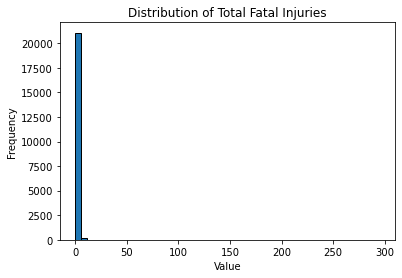

In [40]:
# Viewing Distrobution of 'Total.Fatal.Injuries' values
plt.hist(df_1985['Total.Fatal.Injuries'], bins=50, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Fatal Injuries')

plt.show()

In [41]:
#df_1985.shape

(21295, 30)

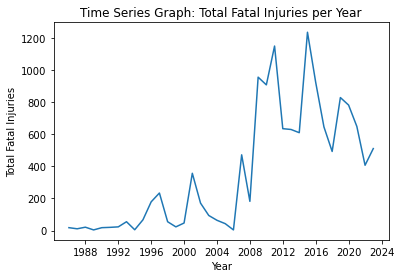

In [42]:
# Plotting 'Total.Fatal.Injuries' over time
df_1985['Total.Fatal.Injuries'] = pd.to_numeric(df_1985['Total.Fatal.Injuries'], errors='coerce')

df_resampled = df_1985.resample('Y', on='Event.Date')['Total.Fatal.Injuries'].sum()

plt.plot(df_resampled.index, df_resampled)
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.title('Time Series Graph: Total Fatal Injuries per Year')
plt.show()

In [43]:
#df_1985.shape

(21295, 30)

In [44]:
df_1985 = df_1985[df_1985["Publication.Date"].notna()]
df_1985

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001214X35509,Accident,DEN85LA064,1985-01-14,"WAPITI, WY",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,1,1,NaN,VMC,Maneuvering,Probable Cause,12-01-2016
20001214X36510,Accident,LAX85LA257,1985-05-13,"MESA, AZ",United States,NaN,NaN,FFZ,FALCON FLD.,Non-Fatal,...,Positioning,NaN,0,1,NaN,NaN,VMC,Approach,Probable Cause,03-08-2011
20001214X36887,Accident,NYC85FA145B,1985-06-11,"BELMAR, NJ",United States,NaN,NaN,BLM,BELMAR MONMOUTH CO.,Fatal(1),...,Instructional,NaN,1,1,4,NaN,VMC,Takeoff,Probable Cause,08-04-2013
20001214X37274,Accident,NYC85LA188,1985-07-21,"SIDNEY, ME",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,NaN,NaN,4.0,VMC,Takeoff,Probable Cause,01-02-2016
20001214X37718,Accident,ATL85MA286,1985-09-29,"JENKINSBURG, GA",United States,NaN,NaN,NaN,WEST WIND SPORT PARACHUTE,Fatal(17),...,Skydiving,NaN,17,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,Non-Fatal,...,NaN,NaN,0,0,0,1.0,NaN,NaN,NaN,14-12-2022
20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,...,Personal,SKY WEST AVIATION INC TRUSTEE,0,0,0,1.0,VMC,NaN,NaN,27-12-2022
20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,...,NaN,NaN,0,0,0,1.0,NaN,NaN,NaN,19-12-2022


In [45]:
#df_1985.shape

(20399, 30)

In [46]:
# Loading in State Abbreviations
dfa = pd.read_csv('data/USState_Codes.csv',
                 encoding='Latin-1',
                 low_memory=False,
                 dtype=str)  
dfa.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [47]:
df_1985.loc[:, 'Total.Fatal.Injuries'] = pd.to_numeric(df_1985['Total.Fatal.Injuries'], errors = 'coerce')
dfi_1985 = df_1985[df_1985['Total.Fatal.Injuries']>= 1]
dfi_1985.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001214X36887,Accident,NYC85FA145B,1985-06-11,"BELMAR, NJ",United States,NaN,NaN,BLM,BELMAR MONMOUTH CO.,Fatal(1),...,Instructional,NaN,1,1,4,NaN,VMC,Takeoff,Probable Cause,08-04-2013
20001214X37718,Accident,ATL85MA286,1985-09-29,"JENKINSBURG, GA",United States,NaN,NaN,NaN,WEST WIND SPORT PARACHUTE,Fatal(17),...,Skydiving,NaN,17,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
20001213X33054,Accident,FTW86FA050,1986-03-29,"SEAGOVILLE, TX",United States,NaN,NaN,59F,SEAGOVILLE,Fatal(3),...,Skydiving,NaN,3,2,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
20001213X33276,Accident,FTW86FA066B,1986-04-15,"HANKAMER, TX",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Aerial Application,NaN,2,NaN,NaN,NaN,VMC,Descent,Probable Cause,08-04-2013
20001213X33276,Accident,FTW86FA066A,1986-04-15,"HANKAMER, TX",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Aerial Application,NaN,2,NaN,NaN,NaN,VMC,Standing,Probable Cause,08-04-2013


In [48]:
#df_1985.shape

(20399, 30)

In [49]:
make_frequency = df_1985['Make'].value_counts()
make_frequency

CESSNA              6922
PIPER               3921
BEECH               1450
BOEING              1089
AIR TRACTOR          419
                    ... 
NEW STANDARD           1
FOXAIR LLC             1
Heldeberg Design       1
RANS INC               1
Evolution              1
Name: Make, Length: 952, dtype: int64

In [50]:
# Checking 'Total.Fatal.Injuries' for a specific 'Model'
specific_model = '152'
fatalities_with_specific_model = df_1985[df_1985['Model'] == specific_model]['Total.Fatal.Injuries'].sum()

fatalities_with_specific_model

50

In [51]:
# Viewing 'Total.Fatal.Injuries' by 'Model'
fatalities_by_model = df_1985.groupby('Model')['Total.Fatal.Injuries'].sum()
fatalities_by_model = fatalities_by_model.sort_values(ascending=False)
fatalities_by_model

Model
737          1279
777 - 206     534
A321          381
A330          331
172           197
             ... 
J3F-65          0
J3F-60          0
J3F-50          0
J3F 65          0
0-1A            0
Name: Total.Fatal.Injuries, Length: 3303, dtype: int32

In [52]:
# Viewing 'Total.Fatal.Injuries' by 'Make'
fatalities_by_make = df_1985.groupby('Make')['Total.Fatal.Injuries'].sum()
fatalities_by_make = fatalities_by_make.sort_values(ascending=False)
fatalities_by_make

Make
BOEING                      2404
CESSNA                      2371
PIPER                       1522
AIRBUS                      1236
BEECH                       1063
                            ... 
MARY ALEXANDER                 0
MARTIN CHARLES A               0
MAGNAGHI AERONAUTICA SPA       0
M-SQUARED AIRCRAFT             0
177MF LLC                      0
Name: Total.Fatal.Injuries, Length: 952, dtype: int32

In [53]:
Engine_numbers = df_1985['Number.of.Engines'].value_counts()
Engine_numbers

1    15458
2     2864
4       78
3       31
0        7
6        1
8        1
Name: Number.of.Engines, dtype: int64

In [54]:
FAR_description = df_1985['FAR.Description'].value_counts()
FAR_description

091                              13203
Part 91: General Aviation         2478
NUSN                               884
137                                736
NUSC                               674
121                                602
135                                533
UNK                                181
129                                155
Part 137: Agricultural             150
PUBU                               125
Part 121: Air Carrier               78
Part 135: Air Taxi & Commuter       74
Non-U.S., Non-Commercial            14
091K                                13
Public Use                          11
125                                  5
Part 129: Foreign                    4
Non-U.S., Commercial                 4
Unknown                              4
ARMF                                 4
Part 125: 20+ Pax,6000+ lbs          1
107                                  1
Part 91 Subpart K: Fractional        1
Public Aircraft                      1
Name: FAR.Description, dt

In [55]:
weather_condition = df_1985['Weather.Condition'].value_counts()
weather_condition

VMC    16822
IMC     1023
Unk      206
UNK       13
Name: Weather.Condition, dtype: int64

In [56]:
weather_impact = df_1985.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum()
weather_impact = weather_impact.sort_values(ascending=False)
weather_impact

Weather.Condition
VMC    4167
IMC    1813
Unk     206
UNK       9
Name: Total.Fatal.Injuries, dtype: int32

In [57]:
# Where do crashes happen most frequently 
#df_1985['Broad.phase.of.flight'].value_counts()

In [58]:
#Showing which Broad.phase.of.flight has the most fatal injuries
grouped_df = df_1985.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum()
fatalaties_by_phase = grouped_df.sort_values(ascending=False)
fatalaties_by_phase[:12]

Broad.phase.of.flight
Takeoff        184
Maneuvering     99
Cruise          90
Approach        84
Climb           46
Descent         32
Go-around       13
Unknown          9
Landing          9
Standing         5
Taxi             1
Other            0
Name: Total.Fatal.Injuries, dtype: int32

In [59]:
# Viewing how often each 'Make' experiences a specific level of 'Aircraft.damage'
specific_damage_counts = df_1985.groupby(['Make', 'Aircraft.damage']).size()
specific_damage_counts_sorted = specific_damage_counts.sort_values(ascending=False)
specific_damage_counts_sorted[:25]

Make         Aircraft.damage
CESSNA       Minor              4710
PIPER        Minor              2504
CESSNA       Substantial        1613
PIPER        Substantial        1001
BEECH        Minor               804
BOEING       Minor               785
CESSNA       Destroyed           561
PIPER        Destroyed           402
BEECH        Substantial         395
             Destroyed           246
AIR TRACTOR  Minor               241
MOONEY       Minor               207
AMERICAN     Minor               207
CIRRUS       Minor               203
MAULE        Minor               165
AIRBUS       Minor               155
BELLANCA     Minor               145
MOONEY       Substantial         142
AVIAT        Minor               138
AERONCA      Minor               135
AIR TRACTOR  Substantial         130
GRUMMAN      Minor               126
EMBAER       Minor               117
CIRRUS       Substantial         112
DEHAVILLAND  Minor               111
dtype: int64

In [60]:
#Total.Fatal.Injuries by Aircraft.Damage
Damage_Fatal = df_1985.groupby('Aircraft.damage')['Total.Fatal.Injuries'].sum()
fatalaties_by_Damage = Damage_Fatal.sort_values(ascending=False)
fatalaties_by_Damage

Aircraft.damage
Destroyed      7623
Substantial    3268
Minor           787
Unknown          30
Name: Total.Fatal.Injuries, dtype: int32

In [61]:
#Total.Fatal.Injuries by Weather.Condition
Weather_Fatal = df_1985.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum()
fatalaties_by_Weather = Weather_Fatal.sort_values(ascending=False)
fatalaties_by_Weather

Weather.Condition
VMC    4167
IMC    1813
Unk     206
UNK       9
Name: Total.Fatal.Injuries, dtype: int32

In [62]:
#Total.Fatal.Injuries by Make
Make_Fatal = df_1985.groupby('Make')['Total.Fatal.Injuries'].sum()
fatalaties_by_Make = Make_Fatal.sort_values(ascending=False)
fatalaties_by_Make[:25]

Make
BOEING            2404
CESSNA            2371
PIPER             1522
AIRBUS            1236
BEECH             1063
EMBAER             329
CIRRUS             233
MOONEY             188
DEHAVILLAND        150
AMERICAN           118
ATR                101
RAYTHEON            90
TUPOLEV             89
SUKHOI              86
AIR TRACTOR         85
BOMBARDIER          78
ANTONOV             71
SOCATA              56
GRUMMAN             54
LEARJET             52
BRITTEN-NORMAN      40
BELLANCA            39
MAULE               36
GULFSTREAM          35
CHAMPION            34
Name: Total.Fatal.Injuries, dtype: int32

In [63]:
#Total.Fatal.Injuries by 'Make_Model'
df_1985.loc[:, 'Make_Model'] = df_1985.loc[:, 'Make'] + '_' + df_1985.loc[:, 'Model']
Model_Fatal = df_1985.groupby('Make_Model')['Total.Fatal.Injuries'].sum()
fatalaties_by_Model = Model_Fatal.sort_values(ascending=False)
fatalaties_by_Model[:50]

Make_Model
BOEING_737                    1279
BOEING_777 - 206               534
AIRBUS_A321                    381
AIRBUS_A330                    331
CESSNA_172                     197
AIRBUS_A320                    170
CIRRUS_SR-22                   168
AIRBUS_A320 - 216              162
BOEING_737-800                 154
EMBAER_E135 Legacy             154
BOEING_MD-82                   154
AIRBUS_A310                    152
CESSNA_182                     124
BEECH_A36                      121
CESSNA_208                     111
PIPER_PA28                     105
TUPOLEV_TU154                   89
BOEING_737-500                  88
BEECH_58                        85
CESSNA_208B                     82
BOEING_727                      80
CESSNA_172-N                    76
ANTONOV_AN148                   71
BEECH_1900                      62
ATR_72-500                      58
CESSNA_150                      57
CESSNA_210                      56
CIRRUS_SR20                     53
CESSNA_15

In [64]:
grouped_by_make = df_1985.groupby('Make')['Model'].unique()

for make, models in grouped_by_make.items():
    print(f"Make: {make}")
    print("Models:")
    for model in models:
        print(f"  - {model}")
    print()

Make: 177MF LLC
Models:
  - PITTS MODEL 12

Make: 2021FX3 LLC
Models:
  - CCX-2000

Make: 3XTRIM
Models:
  - 450 ULTRA

Make: 737
Models:
  - 800

Make: AAA AIRCRAFT LLC
Models:
  - CCX-2000

Make: AB Sportine Aviacija
Models:
  - Genesis 2

Make: ADAMS DENNIS ALLEN
Models:
  - VARIEZE

Make: AERMACCHI
Models:
  - IMPALA MB-326M

Make: AERO ADVENTURE
Models:
  - ZEPHYR II

Make: AERO AT SP ZOO
Models:
  - AT-4 LSA

Make: AERO COMMANDER
Models:
  - 500-B
  - 690A
  - 500S
  - 112A
  - 500-S
  - S2R
  - 680-F
  - 690
  - 100
  - CallAir
  - 560E
  - 500
  - 680FL
  - 114-B
  - 100-180
  - CALLAIR A-9B
  - 560-F
  - 685
  - 680E
  - 200D
  - CALLAIR A 9B
  - 500A
  - 680 E
  - B1A
  - CALLAIR A 9
  - 112
  - 680 F

Make: AERO SP Z O O
Models:
  - AT-4 LSA
  - AT 4 LSA

Make: AERO VODOCHODY
Models:
  - L-29
  - L39C
  - L-39
  - L39
  - L 39C
  - L 39

Make: AEROFAB INC
Models:
  - LAKE LA 250
  - LAKE LA 4 250

Make: AEROFAB INC.
Models:
  - Lake LA-4-250

Make: AEROMOT
Models:
  - AMT200

  - 182A
  - K172R
  - 185
  - 550
  - P206C
  - 205
  - TU-206G
  - 182C
  - 182E
  - U206G
  - 172-P
  - 182M
  - 402C
  - 182N
  - P206
  - T310R
  - 188
  - 150H
  - 188B
  - A185F
  - 150G
  - 180
  - A150M
  - 182R
  - 172-S
  - 190
  - 177
  - 182H
  - 172-K
  - R172K
  - 140
  - 206
  - 172-RG
  - 210-D
  - 150C
  - 195
  - 172-M
  - 172-E
  - 182J
  - C-170
  - 150M
  - 182K
  - 150F
  - 180-H
  - U206F
  - 172-R
  - 172-F
  - 185F
  - 177-A
  - 182P
  - T210M
  - C195A
  - 172-C
  - 172-A
  - 150J
  - 182T
  - C-180
  - 180-A
  - A185E
  - C-152
  - 305-A
  - 150E
  - 180-J
  - T188C
  - 177-B
  - A188A
  - T210L
  - TR182
  - T210N
  - 401
  - 310P
  - T210J
  - 180-E
  - R182
  - 150L
  - 172-D
  - 182F
  - 310Q
  - 172-SP
  - 172-L
  - 172-H
  - C-150J
  - TU206A
  - 207
  - 182RG
  - 310I
  - T182T
  - P210N
  - 172-B
  - 310J
  - 441
  - 414A
  - 421-C
  - 182S
  - 310-J
  - 182G
  - 177-RG
  - TU206G
  - 175
  - A188B
  - 337 B
  - U206E
  - 170
  - C-172M
  - 207A
  - 

Make: FRANKE ROLAND
Models:
  - SKY RAIDER

Make: FREEMAN HERITAGE COLLECTION
Models:
  - SE5A

Make: FRITZ NEUMEYER
Models:
  - GLASAIR II FT / 1865

Make: FUJI
Models:
  - LM1

Make: FUNK
Models:
  - B85C

Make: FURLONG
Models:
  - CA-6

Make: Fairchild
Models:
  - Dornier 328-300
  - 24R-40
  - 24W-41A
  - SA227-AC
  - SW3

Make: Fairchild Industries
Models:
  - SA226-TC

Make: Fairchild Swearingen
Models:
  - SA 227-AC

Make: Fantasy Air
Models:
  - Allegro 2000
  - ALLEGRO

Make: Fleet
Models:
  - 2

Make: Flugzeugproduktions-und Vertri
Models:
  - EA 300/L

Make: Focke-Wulf
Models:
  - FWP-149D

Make: Fokker
Models:
  - 28-4000
  - F27-500
  - F28-4000
  - F28

Make: Forney
Models:
  - F-1

Make: GARDAN
Models:
  - GY80-160

Make: GATES LEAR JET
Models:
  - 25B
  - 35

Make: GATES LEAR JET CORP.
Models:
  - 36

Make: GEIST DONALD R
Models:
  - KOLB FIRESTAR II

Make: GENERAL ATOMICS
Models:
  - MQ-9
  - MQ-9B

Make: GENTRY JOHN K
Models:
  - CHINOOK PL

Make: GIPPSAERO PTY LTD
Mo

  - GLASTAR

Make: RANS
Models:
  - S-4 Coyote I
  - S-12 XL AIRAILE
  - S12
  - COYOTE II S6
  - S-12
  - S7
  - S-17
  - RV 12
  - S 12XL
  - S 5
  - S6
  - COYOTE S 4

Make: RANS AIRCRAFT
Models:
  - S 6S

Make: RANS DESIGNS INC
Models:
  - S-7LS

Make: RANS EMPLOYEE FLYING CLUB
Models:
  - RANS S 6S

Make: RANS INC
Models:
  - S-6

Make: RATHEON AIRCRAFT COMPANY
Models:
  - A36

Make: RAY E ROBERTS
Models:
  - KITFOX V VIXEN

Make: RAYTHEON
Models:
  - 400A
  - Hawker 800XP
  - B-1900
  - B200
  - A36
  - C90A
  - 1900D
  - B36TC
  - B300
  - 99A
  - COBRA
  - BAE 125-800A
  - G36
  - B-350
  - BE-400A
  - 58
  - 390
  - HAWKER
  - C90GT
  - BAE 125 800
  - HAWKER 800XP

Make: REARWIN
Models:
  - 8135

Make: REIMS
Models:
  - F172
  - 406
  - CESSNA FR172

Make: REMOS ACFT GMBH FLUGZEUGBAU
Models:
  - REMOS GX

Make: REMOS AIRCRAFT GMBH
Models:
  - REMOS GX
  - Gemini Remos
  - REMOS G-3/
  - G-3/600
  - REMOS G-3/600
  - G 3/600

Make: REMOS AIRCRAFT GMBH FLUGZEUGBA
Models:
  - GX

In [65]:
df_1985['Make_Model'].value_counts()[:25]

CESSNA_172         738
BOEING_737         343
CESSNA_152         307
CESSNA_182         281
CESSNA_172-S       274
CIRRUS_SR-22       271
PIPER_PA28         260
CESSNA_172-N       247
CESSNA_180         211
CESSNA_172-M       181
PIPER_PA-18-150    172
BEECH_A36          168
CESSNA_150         168
PIPER_PA-28-140    161
CESSNA_172-P       144
CESSNA_140         114
CESSNA_172-R       110
CESSNA_170-B       108
PIPER_PA-28-161    106
PIPER_PA-28-180    102
PIPER_PA-28-181     92
CESSNA_210          92
MOONEY_M20J         91
CESSNA_A185F        90
AERONCA_7AC         89
Name: Make_Model, dtype: int64

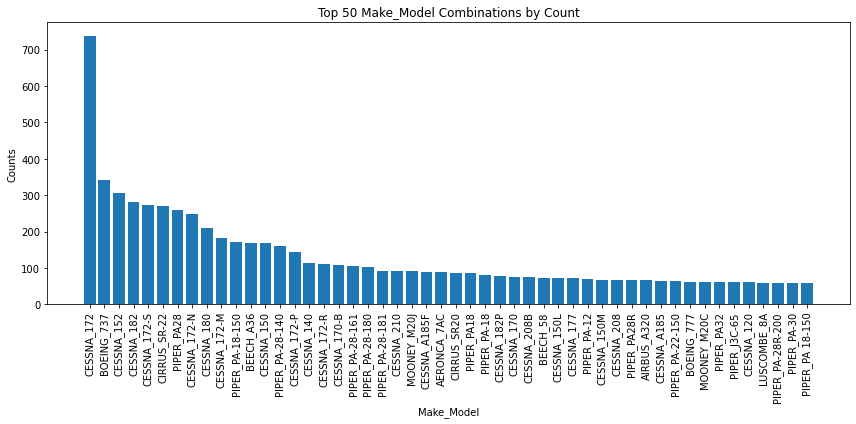

In [66]:
# Count the occurrences of each 'Make_Model' combination
make_model_counts = df_1985['Make_Model'].value_counts()

# Sort the values in descending order and select the top 50 entries (you can change the number as needed)
top_50_counts = make_model_counts.sort_values(ascending=False)[:50]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(top_50_counts.index, top_50_counts.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Counts')
ax.set_title('Top 50 Make_Model Combinations by Count')

# Show the plot
plt.tight_layout()
plt.show()



In [67]:
#df_1985.shape

(20399, 31)

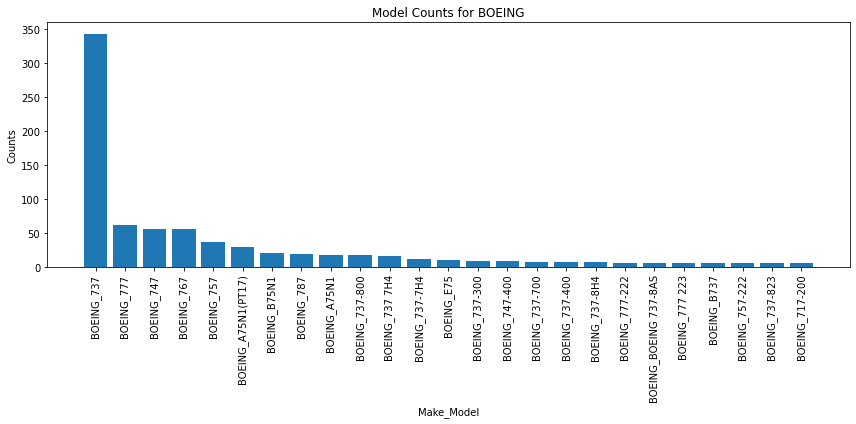

In [68]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'BOEING'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Combine 'Make' and 'Model' columns to create a new column representing the combination
chart_df['Make_Model'] = chart_df['Make'] + '_' + chart_df['Model']

# Count the occurrences of each 'Make_Model' combination
make_model_counts = chart_df['Make_Model'].value_counts()

# Sort the values in descending order and select all entries
all_make_model_counts = make_model_counts.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(all_make_model_counts.index, all_make_model_counts.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Counts')
ax.set_title(f'Model Counts for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()



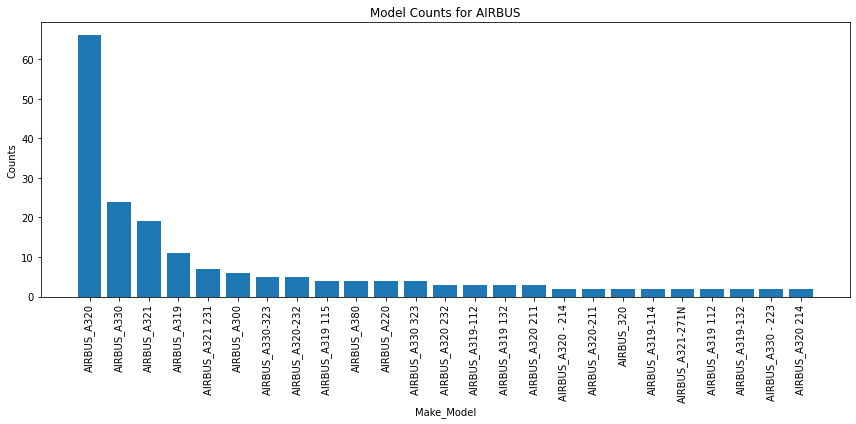

In [69]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'AIRBUS'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Combine 'Make' and 'Model' columns to create a new column representing the combination
chart_df['Make_Model'] = chart_df['Make'] + '_' + chart_df['Model']

# Count the occurrences of each 'Make_Model' combination
make_model_counts = chart_df['Make_Model'].value_counts()

# Sort the values in descending order and select all entries
all_make_model_counts = make_model_counts.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(all_make_model_counts.index, all_make_model_counts.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Counts')
ax.set_title(f'Model Counts for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


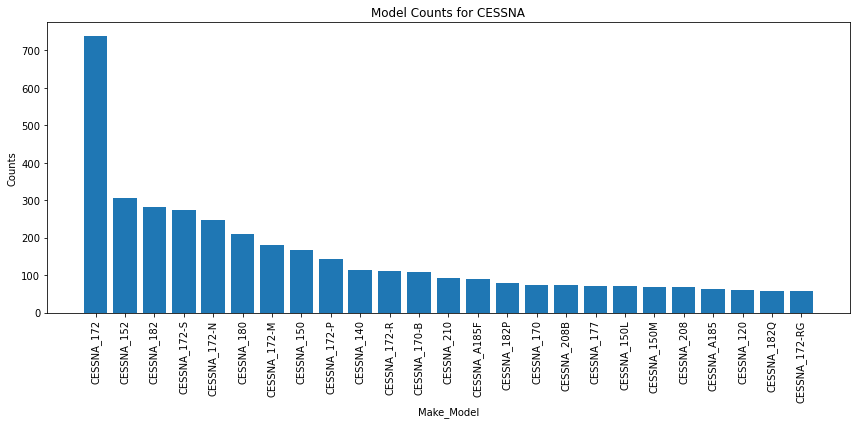

In [70]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'CESSNA'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Combine 'Make' and 'Model' columns to create a new column representing the combination
chart_df['Make_Model'] = chart_df['Make'] + '_' + chart_df['Model']

# Count the occurrences of each 'Make_Model' combination
make_model_counts = chart_df['Make_Model'].value_counts()

# Sort the values in descending order and select all entries
all_make_model_counts = make_model_counts.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(all_make_model_counts.index, all_make_model_counts.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Counts')
ax.set_title(f'Model Counts for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


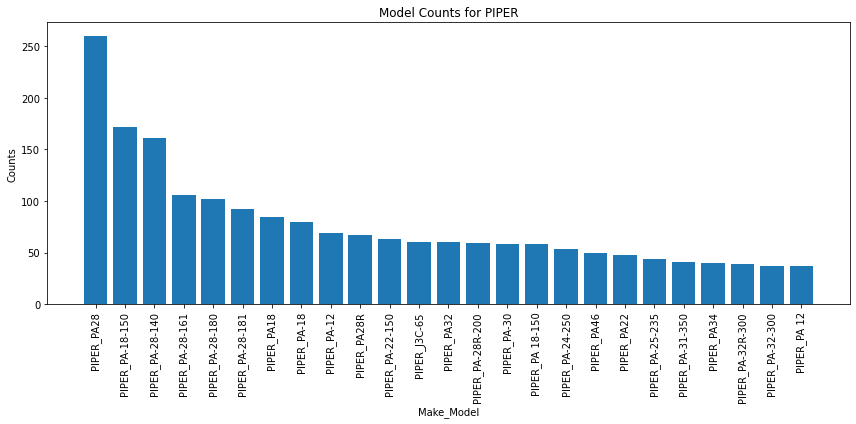

In [71]:
specific_make = 'PIPER'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Combine 'Make' and 'Model' columns to create a new column representing the combination
chart_df['Make_Model'] = chart_df['Make'] + '_' + chart_df['Model']

# Count the occurrences of each 'Make_Model' combination
make_model_counts = chart_df['Make_Model'].value_counts()

# Sort the values in descending order and select all entries
all_make_model_counts = make_model_counts.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(all_make_model_counts.index, all_make_model_counts.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Counts')
ax.set_title(f'Model Counts for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()

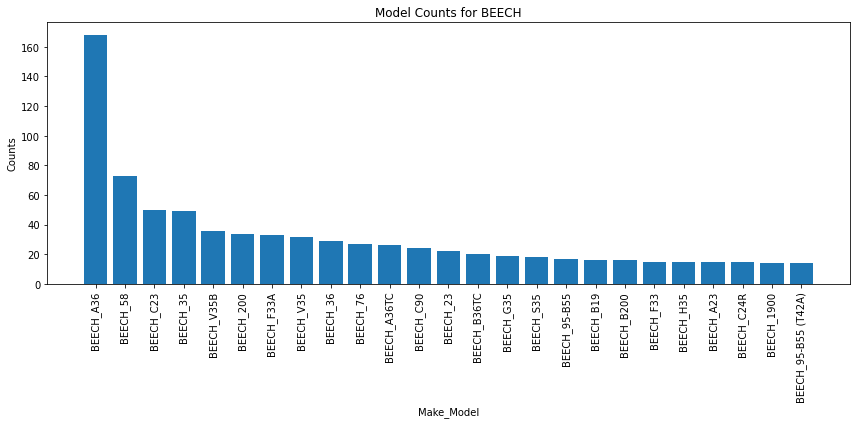

In [72]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'BEECH'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Combine 'Make' and 'Model' columns to create a new column representing the combination
chart_df['Make_Model'] = chart_df['Make'] + '_' + chart_df['Model']

# Count the occurrences of each 'Make_Model' combination
make_model_counts = chart_df['Make_Model'].value_counts()

# Sort the values in descending order and select all entries
all_make_model_counts = make_model_counts.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(all_make_model_counts.index, all_make_model_counts.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Counts')
ax.set_title(f'Model Counts for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()

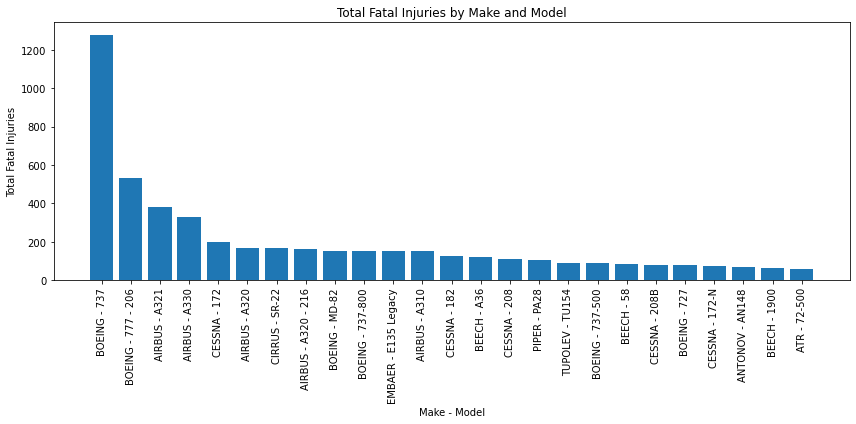

In [73]:
# Group the DataFrame by 'Make' and 'Model' and calculate the sum of 'Total.Fatal.Injuries' for each group
make_model_fatal_injuries = df_1985.groupby(['Make', 'Model'])['Total.Fatal.Injuries'].sum()
make_model_fatal_injuries_sorted = make_model_fatal_injuries.sort_values(ascending=False)[:25]

# Create a new column 'Make_Model' by combining 'Make' and 'Model'
make_model_fatal_injuries_sorted.index = make_model_fatal_injuries_sorted.index.map(lambda x: f'{x[0]} - {x[1]}')
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(make_model_fatal_injuries_sorted.index, make_model_fatal_injuries_sorted.values)
plt.xticks(rotation=90)

ax.set_xlabel('Make - Model')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('Total Fatal Injuries by Make and Model')

plt.tight_layout()
plt.show()



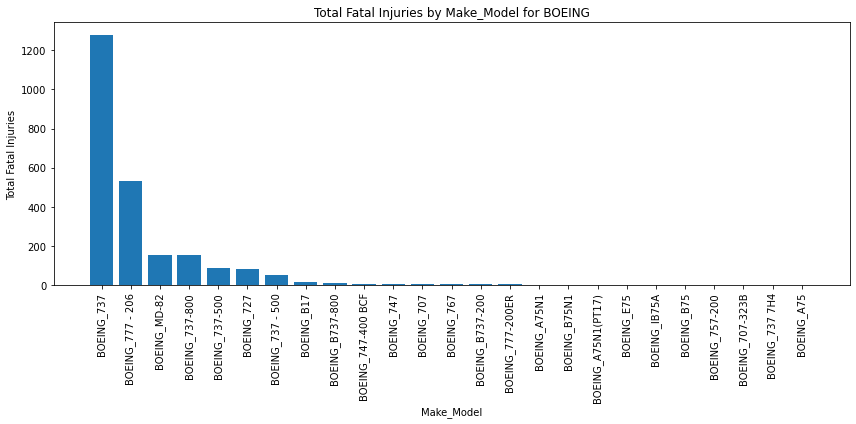

In [74]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'BOEING'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the sum of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].sum()

# Sort the values in descending order
make_model_fatal_injuries_sorted = make_model_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_fatal_injuries_sorted.index, make_model_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title(f'Total Fatal Injuries by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


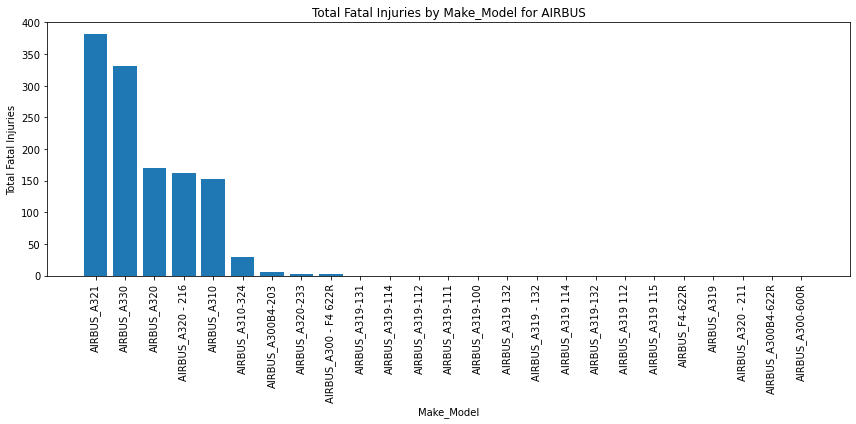

In [75]:
specific_make = 'AIRBUS'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the sum of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].sum()

# Sort the values in descending order
make_model_fatal_injuries_sorted = make_model_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_fatal_injuries_sorted.index, make_model_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title(f'Total Fatal Injuries by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


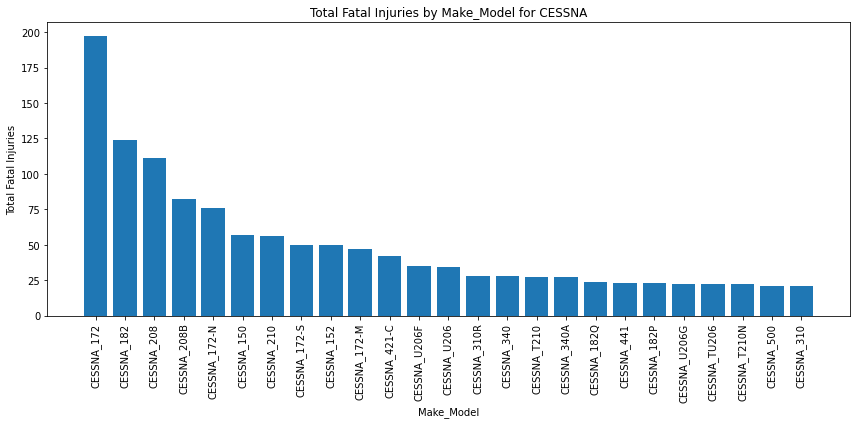

In [76]:
specific_make = 'CESSNA'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the sum of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].sum()

# Sort the values in descending order
make_model_fatal_injuries_sorted = make_model_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_fatal_injuries_sorted.index, make_model_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title(f'Total Fatal Injuries by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


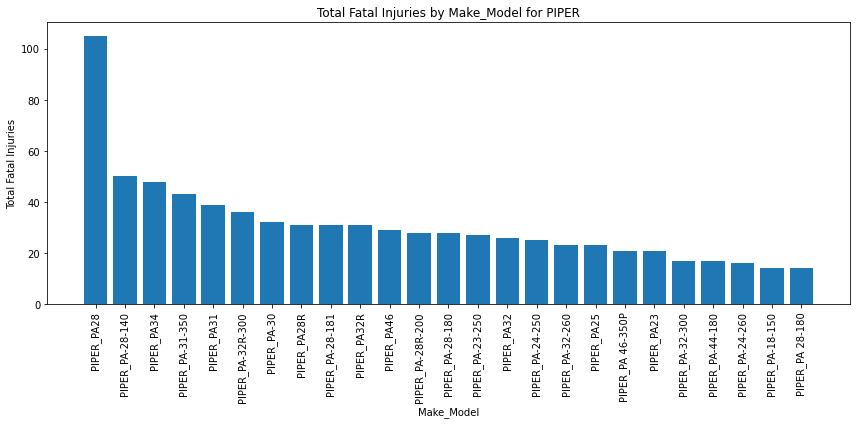

In [77]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'PIPER'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the sum of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].sum()

# Sort the values in descending order
make_model_fatal_injuries_sorted = make_model_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_fatal_injuries_sorted.index, make_model_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title(f'Total Fatal Injuries by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


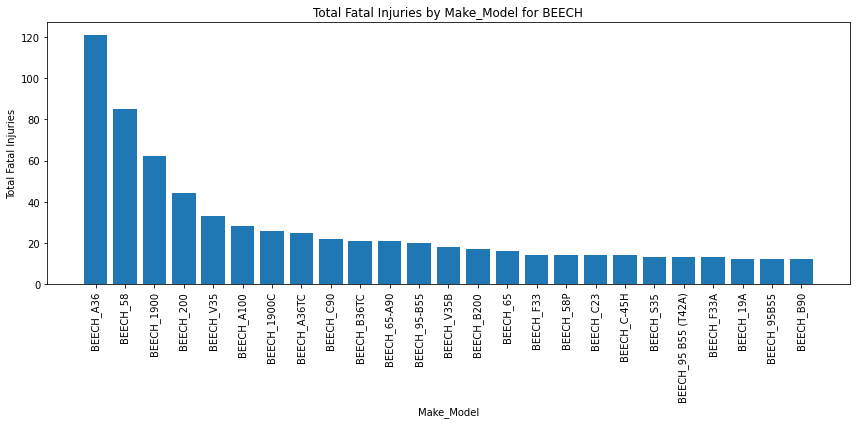

In [78]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'BEECH'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the sum of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].sum()

# Sort the values in descending order
make_model_fatal_injuries_sorted = make_model_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_fatal_injuries_sorted.index, make_model_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title(f'Total Fatal Injuries by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()



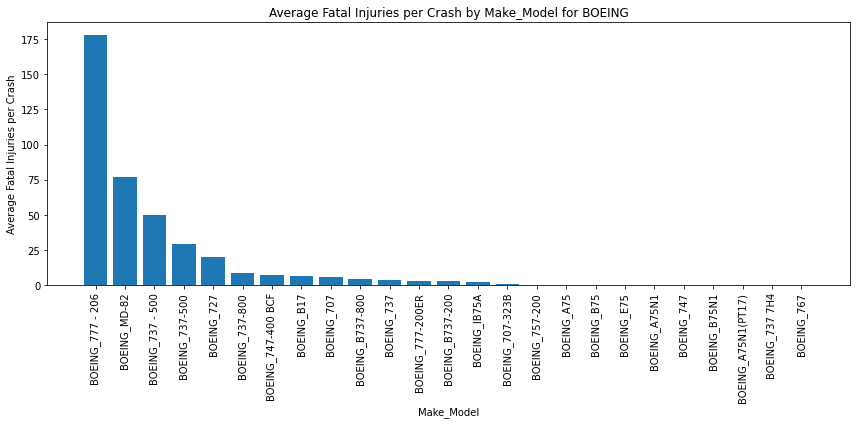

In [79]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'BOEING'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the average of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_avg_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].mean()

# Sort the values in descending order
make_model_avg_fatal_injuries_sorted = make_model_avg_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_avg_fatal_injuries_sorted.index, make_model_avg_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Average Fatal Injuries per Crash')
ax.set_title(f'Average Fatal Injuries per Crash by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


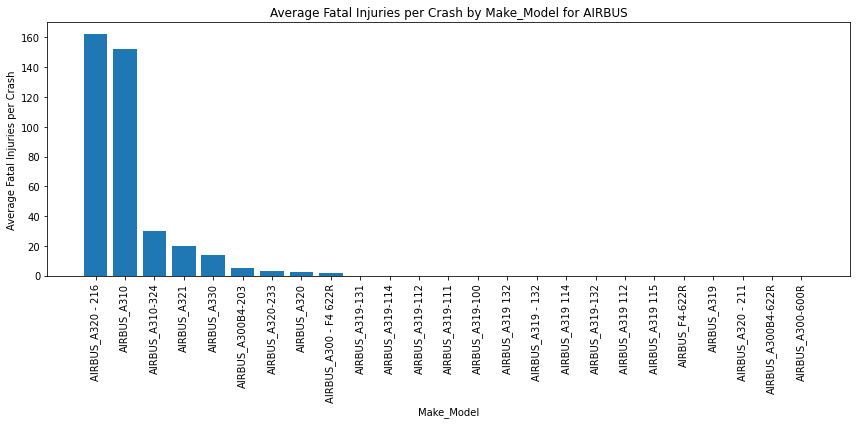

In [80]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'AIRBUS'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the average of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_avg_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].mean()

# Sort the values in descending order
make_model_avg_fatal_injuries_sorted = make_model_avg_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_avg_fatal_injuries_sorted.index, make_model_avg_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Average Fatal Injuries per Crash')
ax.set_title(f'Average Fatal Injuries per Crash by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


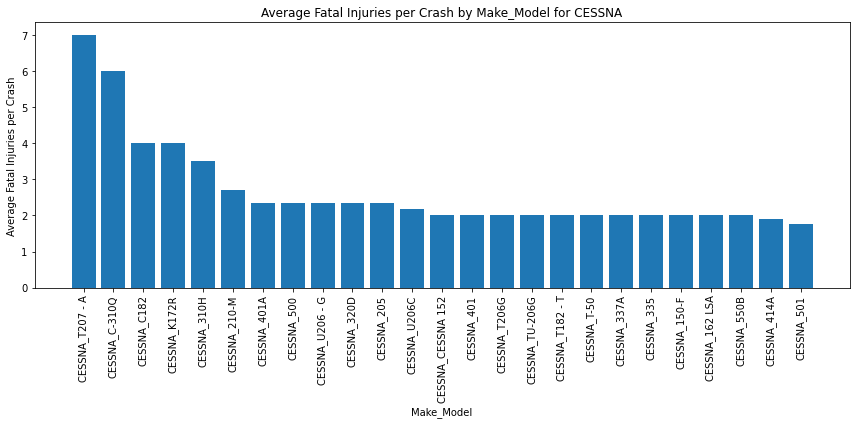

In [81]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'CESSNA'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the average of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_avg_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].mean()

# Sort the values in descending order
make_model_avg_fatal_injuries_sorted = make_model_avg_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_avg_fatal_injuries_sorted.index, make_model_avg_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Average Fatal Injuries per Crash')
ax.set_title(f'Average Fatal Injuries per Crash by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


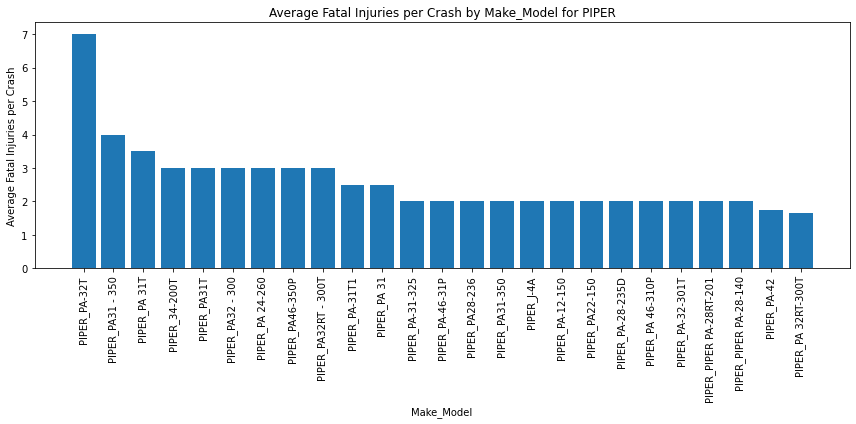

In [82]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'PIPER'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the average of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_avg_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].mean()

# Sort the values in descending order
make_model_avg_fatal_injuries_sorted = make_model_avg_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_avg_fatal_injuries_sorted.index, make_model_avg_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Average Fatal Injuries per Crash')
ax.set_title(f'Average Fatal Injuries per Crash by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


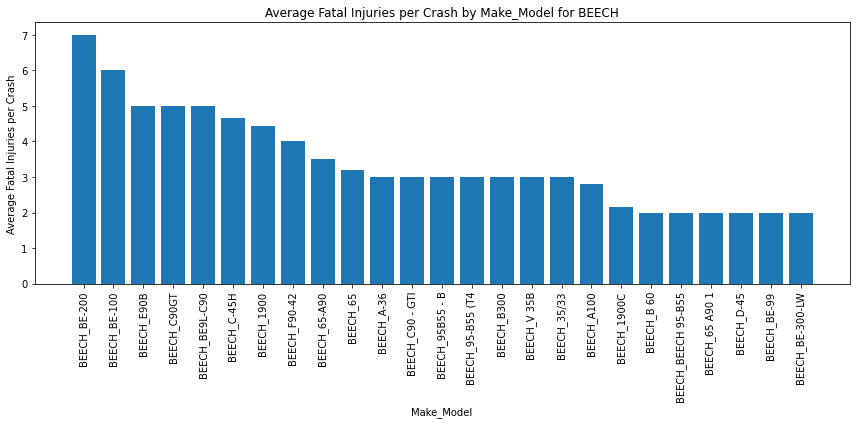

In [83]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'BEECH'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Group the DataFrame by 'Make_Model' and calculate the average of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_avg_fatal_injuries = chart_df.groupby('Make_Model')['Total.Fatal.Injuries'].mean()

# Sort the values in descending order
make_model_avg_fatal_injuries_sorted = make_model_avg_fatal_injuries.sort_values(ascending=False)[:25]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
ax.bar(make_model_avg_fatal_injuries_sorted.index, make_model_avg_fatal_injuries_sorted.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Make_Model')
ax.set_ylabel('Average Fatal Injuries per Crash')
ax.set_title(f'Average Fatal Injuries per Crash by Make_Model for {specific_make}')

# Show the plot
plt.tight_layout()
plt.show()


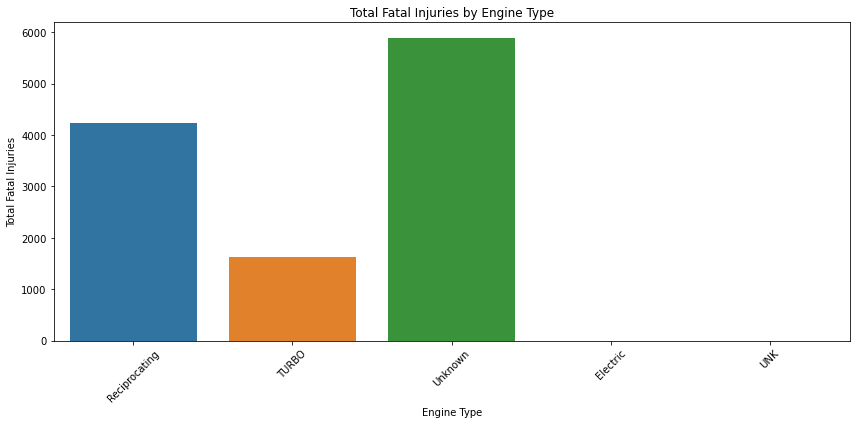

In [84]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's bar plot to compare 'Engine.Type' and 'Total.Fatal.Injuries'
sns.barplot(x='Engine.Type', y='Total.Fatal.Injuries', data=df_1985, ax=ax, estimator=sum, ci=None)

# Set labels and title
ax.set_xlabel('Engine Type')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('Total Fatal Injuries by Engine Type')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


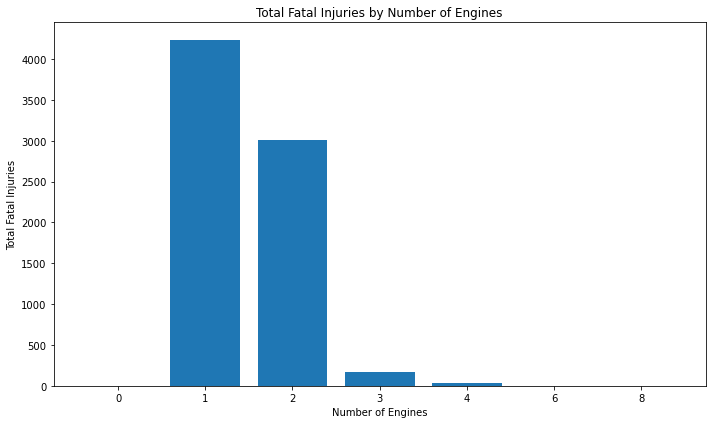

In [85]:
# Group the DataFrame by 'Number.of.Engines' and calculate the sum of 'Total.Fatal.Injuries' for each group
engine_injuries_sum = df_1985.groupby('Number.of.Engines')['Total.Fatal.Injuries'].sum()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
ax.bar(engine_injuries_sum.index, engine_injuries_sum.values)

# Set labels and title
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('Total Fatal Injuries by Number of Engines')

# Show the plot
plt.tight_layout()
plt.show()


In [86]:
# Replace 'desired_weather_condition' with the specific weather condition you want to filter by
desired_weather_condition = 'VMC'

# Filter the DataFrame to include only rows with the desired 'Weather.Condition'
filtered_df = df_1985[df_1985['Weather.Condition'] == desired_weather_condition]

# Use value_counts() to get the frequency of each 'Model'
model_counts = filtered_df['Model'].value_counts()

model_counts[:25]

172          654
152          285
172-S        263
172-N        233
182          232
PA28         215
180          204
SR-22        199
172-M        169
PA-18-150    169
A36          152
PA-28-140    148
150          143
172-P        138
170-B        107
140          106
172-R        100
PA-28-180     98
PA-28-161     97
7AC           93
7GCBC         90
A185F         86
PA-28-181     86
PA18          84
PA-18         80
Name: Model, dtype: int64

In [87]:
# Replace 'desired_weather_condition' with the specific weather condition you want to filter by
desired_weather_condition = 'IMC'

# Filter the DataFrame to include only rows with the desired 'Weather.Condition'
filtered_df = df_1985[df_1985['Weather.Condition'] == desired_weather_condition]

# Use value_counts() to get the frequency of each 'Model'
model_counts = filtered_df['Model'].value_counts()

model_counts[:25]

SR-22         39
A36           30
58            16
208B          15
182           15
PA28          13
172           12
310R          10
737            9
SR20           9
PA-32-260      8
M20K           7
PA-32R-300     7
M20J           7
172-N          7
PA-34-200T     6
200            6
441            6
340A           6
PA46           6
PA32R          6
172-M          6
207            6
172-R          6
PA-30          5
Name: Model, dtype: int64

In [88]:
# Group the DataFrame by 'Weather.Condition' and 'Model', and calculate the sum of 'Total.Fatal.Injuries' for each group
weather_model_fatal_injuries = df_1985.groupby(['Weather.Condition', 'Model'])['Total.Fatal.Injuries'].sum()

# Reset the index to convert the resulting Series back to a DataFrame
weather_model_fatal_injuries_df = weather_model_fatal_injuries.reset_index()

# Sort the DataFrame in descending order based on the 'Total.Fatal.Injuries' column

weather_model_fatal_injuries_df_sorted = weather_model_fatal_injuries_df.sort_values(by='Total.Fatal.Injuries', ascending=False)
weather_model_fatal_injuries_df_sorted = weather_model_fatal_injuries_df_sorted.reset_index(drop=True)

# Display the sorted DataFrame
weather_model_fatal_injuries_df_sorted[:25]


,Weather.Condition,Model,Total.Fatal.Injuries
0,IMC,E135 Legacy,154
1,IMC,737-800,154
2,VMC,172,96
3,IMC,737,90
4,IMC,TU154,89
5,VMC,SR-22,85
6,VMC,A36,70
7,VMC,182,60
8,IMC,SR-22,56
9,VMC,172-N,56


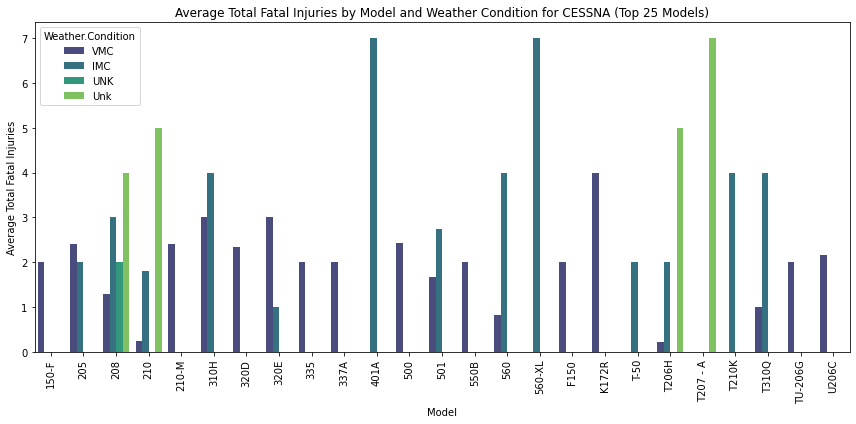

In [89]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'CESSNA'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()

# Group the DataFrame by 'Model' and 'Weather.Condition', then calculate the mean of 'Total.Fatal.Injuries'
model_weather_injuries = chart_df.groupby(['Model', 'Weather.Condition'])['Total.Fatal.Injuries'].mean().reset_index()

# Get the top 25 'Model' values by mean 'Total.Fatal.Injuries'
top_25_models = model_weather_injuries.groupby('Model')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(25).index

# Filter the DataFrame to include only the top 25 'Model' values
top_25_df = model_weather_injuries[model_weather_injuries['Model'].isin(top_25_models)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's barplot to create the bar chart
sns.barplot(x='Model', y='Total.Fatal.Injuries', hue='Weather.Condition', data=top_25_df, ax=ax, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Average Total Fatal Injuries')
ax.set_title(f'Average Total Fatal Injuries by Model and Weather Condition for {specific_make} (Top 25 Models)')

# Show the plot
plt.tight_layout()
plt.show()


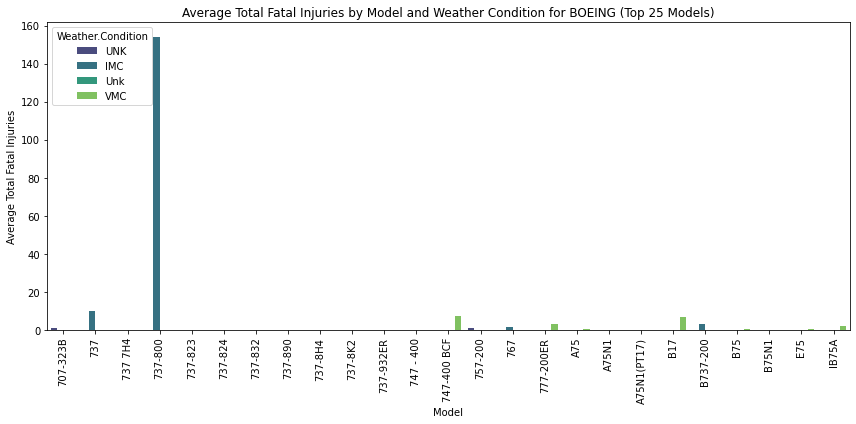

In [90]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'BOEING'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()

# Group the DataFrame by 'Model' and 'Weather.Condition', then calculate the mean of 'Total.Fatal.Injuries'
model_weather_injuries = chart_df.groupby(['Model', 'Weather.Condition'])['Total.Fatal.Injuries'].mean().reset_index()

# Get the top 25 'Model' values by mean 'Total.Fatal.Injuries'
top_25_models = model_weather_injuries.groupby('Model')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(25).index

# Filter the DataFrame to include only the top 25 'Model' values
top_25_df = model_weather_injuries[model_weather_injuries['Model'].isin(top_25_models)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's barplot to create the bar chart
sns.barplot(x='Model', y='Total.Fatal.Injuries', hue='Weather.Condition', data=top_25_df, ax=ax, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Average Total Fatal Injuries')
ax.set_title(f'Average Total Fatal Injuries by Model and Weather Condition for {specific_make} (Top 25 Models)')

# Show the plot
plt.tight_layout()
plt.show()


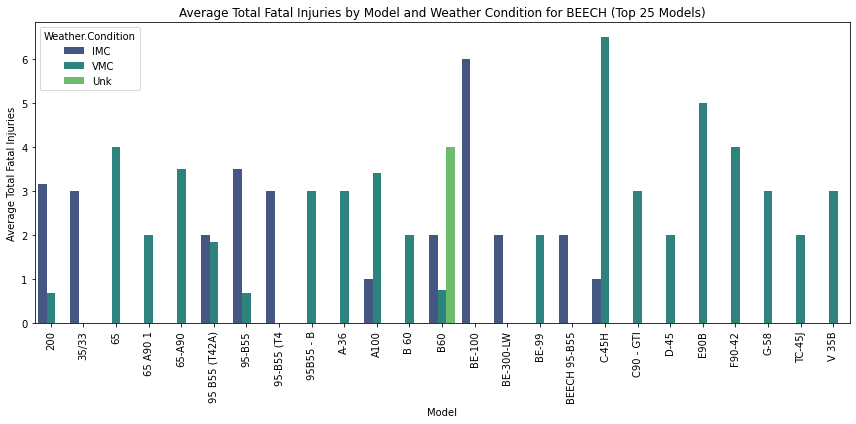

In [91]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'BEECH'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()

# Group the DataFrame by 'Model' and 'Weather.Condition', then calculate the mean of 'Total.Fatal.Injuries'
model_weather_injuries = chart_df.groupby(['Model', 'Weather.Condition'])['Total.Fatal.Injuries'].mean().reset_index()

# Get the top 25 'Model' values by mean 'Total.Fatal.Injuries'
top_25_models = model_weather_injuries.groupby('Model')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(25).index

# Filter the DataFrame to include only the top 25 'Model' values
top_25_df = model_weather_injuries[model_weather_injuries['Model'].isin(top_25_models)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's barplot to create the bar chart
sns.barplot(x='Model', y='Total.Fatal.Injuries', hue='Weather.Condition', data=top_25_df, ax=ax, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Average Total Fatal Injuries')
ax.set_title(f'Average Total Fatal Injuries by Model and Weather Condition for {specific_make} (Top 25 Models)')

# Show the plot
plt.tight_layout()
plt.show()


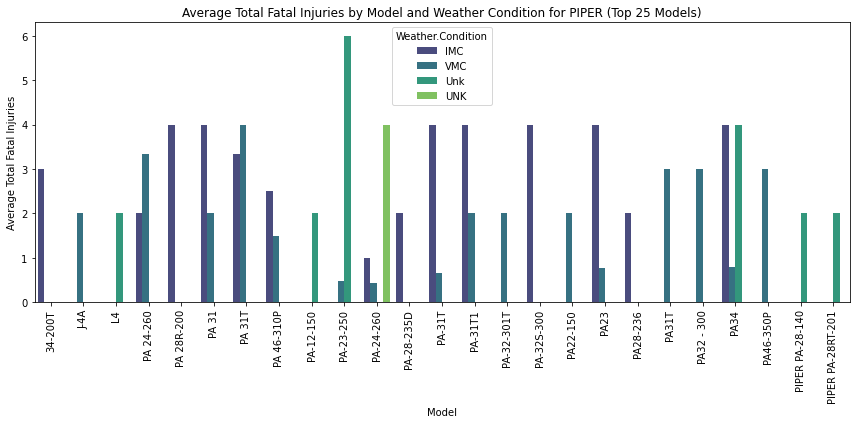

In [92]:
# Filter the DataFrame to include only rows with the desired 'Make'
specific_make = 'PIPER'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()

# Group the DataFrame by 'Model' and 'Weather.Condition', then calculate the mean of 'Total.Fatal.Injuries'
model_weather_injuries = chart_df.groupby(['Model', 'Weather.Condition'])['Total.Fatal.Injuries'].mean().reset_index()

# Get the top 25 'Model' values by mean 'Total.Fatal.Injuries'
top_25_models = model_weather_injuries.groupby('Model')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(25).index

# Filter the DataFrame to include only the top 25 'Model' values
top_25_df = model_weather_injuries[model_weather_injuries['Model'].isin(top_25_models)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's barplot to create the bar chart
sns.barplot(x='Model', y='Total.Fatal.Injuries', hue='Weather.Condition', data=top_25_df, ax=ax, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Average Total Fatal Injuries')
ax.set_title(f'Average Total Fatal Injuries by Model and Weather Condition for {specific_make} (Top 25 Models)')

# Show the plot
plt.tight_layout()
plt.show()


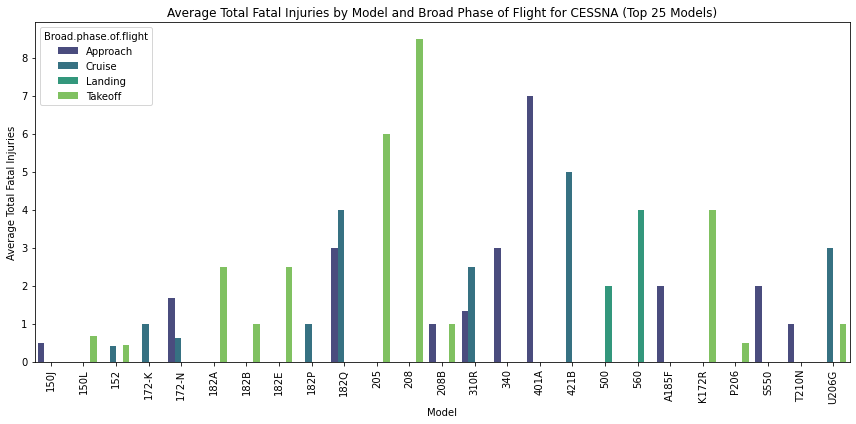

In [93]:
# Define the specific 'Make' you want to analyze
specific_make = 'CESSNA'

# Filter the DataFrame to include only rows with the desired 'Make'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()

# Specify the phases of flight you want to include
selected_phases = ['Landing', 'Takeoff', 'Cruise', 'Approach']

# Filter the data to include only the selected phases of flight
chart_df = chart_df[chart_df['Broad.phase.of.flight'].isin(selected_phases)]

# Group the DataFrame by 'Model' and 'Broad.phase.of.flight', then calculate the mean of 'Total.Fatal.Injuries'
model_flight_phase_injuries = chart_df.groupby(['Model', 'Broad.phase.of.flight'])['Total.Fatal.Injuries'].mean().reset_index()

# Calculate the top 25 'Model' values based on the average 'Total.Fatal.Injuries'
top_25_models = model_flight_phase_injuries.groupby('Model')['Total.Fatal.Injuries'].mean().nlargest(25).index

# Filter the data to include only the top 25 'Model' values
top_25_data = model_flight_phase_injuries[model_flight_phase_injuries['Model'].isin(top_25_models)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's barplot to create the bar chart
sns.barplot(x='Model', y='Total.Fatal.Injuries', hue='Broad.phase.of.flight', data=top_25_data, ax=ax, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Average Total Fatal Injuries')
ax.set_title(f'Average Total Fatal Injuries by Model and Broad Phase of Flight for {specific_make} (Top 25 Models)')

# Show the plot
plt.tight_layout()
plt.show()



In [94]:
# Filter the DataFrame to include only rows with 'Make' value equal to 'BOEING'
boeing_df = df_1985[df_1985['Make'] == 'BOEING']

# Get the unique 'Broad.phase.of.flight' values for the filtered DataFrame
broad_phase_values = boeing_df['Broad.phase.of.flight'].unique()

# Print the unique 'Broad.phase.of.flight' values
print(broad_phase_values)


[nan 'Cruise' 'Standing' 'Landing' 'Descent' 'Taxi' 'Takeoff' 'Climb'
 'Approach' 'Maneuvering']


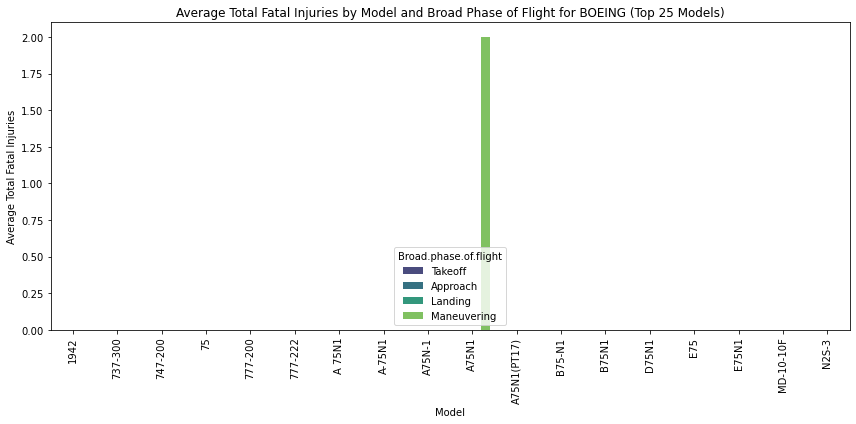

In [95]:
# Define the specific 'Make' you want to analyze
specific_make = 'BOEING'

# Filter the DataFrame to include only rows with the desired 'Make'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()

# Specify the phases of flight you want to include
selected_phases = ['Landing', 'Takeoff', 'Maneuvering', 'Approach']

# Filter the data to include only the selected phases of flight
chart_df = chart_df[chart_df['Broad.phase.of.flight'].isin(selected_phases)]

# Group the DataFrame by 'Model' and 'Broad.phase.of.flight', then calculate the mean of 'Total.Fatal.Injuries'
model_flight_phase_injuries = chart_df.groupby(['Model', 'Broad.phase.of.flight'])['Total.Fatal.Injuries'].mean().reset_index()

# Calculate the top 25 'Model' values based on the average 'Total.Fatal.Injuries'
top_25_models = model_flight_phase_injuries.groupby('Model')['Total.Fatal.Injuries'].mean().nlargest(25).index

# Filter the data to include only the top 25 'Model' values
top_25_data = model_flight_phase_injuries[model_flight_phase_injuries['Model'].isin(top_25_models)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's barplot to create the bar chart
sns.barplot(x='Model', y='Total.Fatal.Injuries', hue='Broad.phase.of.flight', data=top_25_data, ax=ax, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Average Total Fatal Injuries')
ax.set_title(f'Average Total Fatal Injuries by Model and Broad Phase of Flight for {specific_make} (Top 25 Models)')

# Show the plot
plt.tight_layout()
plt.show()

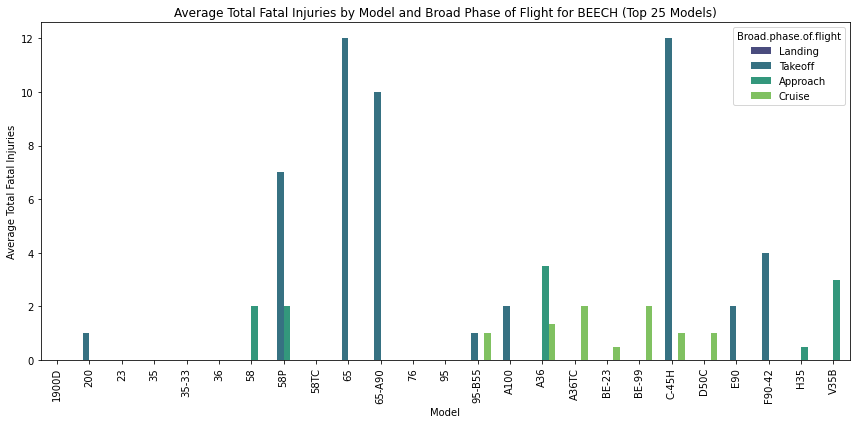

In [96]:
specific_make = 'BEECH'
chart_df = df_1985[df_1985['Make'] == specific_make].copy()

# Specify the phases of flight you want to include
selected_phases = ['Landing', 'Takeoff', 'Cruise', 'Approach']

# Filter the data to include only the selected phases of flight
chart_df = chart_df[chart_df['Broad.phase.of.flight'].isin(selected_phases)]

# Group the DataFrame by 'Model' and 'Broad.phase.of.flight', then calculate the mean of 'Total.Fatal.Injuries'
model_flight_phase_injuries = chart_df.groupby(['Model', 'Broad.phase.of.flight'])['Total.Fatal.Injuries'].mean().reset_index()

# Calculate the top 25 'Model' values based on the average 'Total.Fatal.Injuries'
top_25_models = model_flight_phase_injuries.groupby('Model')['Total.Fatal.Injuries'].mean().nlargest(25).index

# Filter the data to include only the top 25 'Model' values
top_25_data = model_flight_phase_injuries[model_flight_phase_injuries['Model'].isin(top_25_models)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's barplot to create the bar chart
sns.barplot(x='Model', y='Total.Fatal.Injuries', hue='Broad.phase.of.flight', data=top_25_data, ax=ax, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Average Total Fatal Injuries')
ax.set_title(f'Average Total Fatal Injuries by Model and Broad Phase of Flight for {specific_make} (Top 25 Models)')

# Show the plot
plt.tight_layout()
plt.show()


In [97]:
# Group the DataFrame by 'Make_Model' and calculate the sum of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_fatal_injuries = df_1985.groupby('Make_Model')['Total.Fatal.Injuries'].sum()

# Get the value counts of 'Make_Model' to represent occurrences
make_model_value_counts = df_1985['Make_Model'].value_counts()

# Combine the two Series into a DataFrame
result_df = pd.DataFrame({'Occurrences': make_model_value_counts, 'Total.Fatal.Injuries': make_model_fatal_injuries})

# Calculate the average of 'Total.Fatal.Injuries' for each 'Make_Model'
result_df['Average.Fatal.Injuries'] = result_df['Total.Fatal.Injuries'] / result_df['Occurrences']

# Sort the DataFrame by average of 'Total.Fatal.Injuries' in ascending order
result_df = result_df.sort_values(by='Average.Fatal.Injuries', ascending=False)

# Display the resulting DataFrame
result_df[:50]


,Occurrences,Total.Fatal.Injuries,Average.Fatal.Injuries
BOEING_777 - 206,3,534,178.000000
AIRBUS_A320 - 216,1,162,162.000000
EMBAER_E135 Legacy,1,154,154.000000
AIRBUS_A310,1,152,152.000000
TUPOLEV_TU154,1,89,89.000000
BOEING_MD-82,2,154,77.000000
ANTONOV_AN148,1,71,71.000000
ATR_72-500,1,58,58.000000
BOEING_737 - 500,1,50,50.000000
SUKHOI_SJ100,1,44,44.000000


In [98]:
# Group the DataFrame by 'Make_Model' and calculate the sum of 'Total.Fatal.Injuries' for each 'Make_Model'
make_model_fatal_injuries = df_1985.groupby('Make_Model')['Total.Fatal.Injuries'].sum()

# Get the value counts of 'Make_Model' to represent occurrences
make_model_value_counts = df_1985['Make_Model'].value_counts()

# Combine the two Series into a DataFrame
result_df = pd.DataFrame({'Crashes': make_model_value_counts, 'Total.Fatal.Injuries': make_model_fatal_injuries})

# Calculate the average of 'Total.Fatal.Injuries' for each 'Make_Model'
result_df['Average.Fatal.Injuries'] = result_df['Total.Fatal.Injuries'] / result_df['Crashes']
result_df = result_df.sort_values(by=['Crashes', 'Average.Fatal.Injuries'], ascending=[False, False])

result_df[:25]

,Crashes,Total.Fatal.Injuries,Average.Fatal.Injuries
CESSNA_172,738,197,0.266938
BOEING_737,343,1279,3.728863
CESSNA_152,307,50,0.162866
CESSNA_182,281,124,0.441281
CESSNA_172-S,274,50,0.182482
CIRRUS_SR-22,271,168,0.619926
PIPER_PA28,260,105,0.403846
CESSNA_172-N,247,76,0.307692
CESSNA_180,211,15,0.071090
CESSNA_172-M,181,47,0.259669


In [99]:
# Crash/Fatal Injury data on top
top_25_occurrences = result_df.nlargest(25, 'Crashes')
lowest_avg_fatal_injuries = top_25_occurrences.nsmallest(25, 'Average.Fatal.Injuries')

lowest_avg_fatal_injuries[:25]

,Crashes,Total.Fatal.Injuries,Average.Fatal.Injuries
CESSNA_180,211,15,0.071090
PIPER_PA-18-150,172,14,0.081395
CESSNA_172-P,144,12,0.083333
CESSNA_170-B,108,10,0.092593
PIPER_PA-28-161,106,13,0.122642
CESSNA_140,114,17,0.149123
CESSNA_152,307,50,0.162866
AERONCA_7AC,89,15,0.168539
CESSNA_172-R,110,19,0.172727
CESSNA_172-S,274,50,0.182482


In [100]:
# Group the DataFrame by 'Model' and calculate the sum of 'Total.Uninjured' for each 'Model'
model_uninjured = df_1985.groupby('Make_Model')['Total.Uninjured'].sum()
most_uninjured_models = model_uninjured.sort_values(ascending=False)

most_uninjured_models[:25]


Make_Model
BOEING_737                18988.0
BOEING_777                 7743.0
BOEING_767                 4889.0
BOEING_757                 3039.0
AIRBUS_A320                2788.0
AIRBUS_A330                2770.0
BOEING_747                 2320.0
BOEING_787                 2290.0
BOEING_747-400             1712.0
BOEING_737 7H4             1704.0
BOEING_737-7H4             1584.0
BOEING_777-222             1523.0
AIRBUS_A330-323            1395.0
AIRBUS_A321                1349.0
BOEING_737-800             1229.0
AIRBUS_A380                1097.0
EMBAER_EMB-145LR            955.0
BOEING_757-222              908.0
BOEING_767 332              898.0
MCDONNELL DOUGLAS_MD80      894.0
AIRBUS_A321 231             848.0
AIRBUS_A330 323             847.0
BOEING_737-300              846.0
BOEING_747-422              846.0
CESSNA_172                  815.0
Name: Total.Uninjured, dtype: float64

In [101]:
# Select the 'Engine.Type' and 'Number.of.Engines' columns and drop duplicates
unique_combinations = df_1985[['Engine.Type', 'Number.of.Engines']].drop_duplicates()

# Display the unique combinations
print(unique_combinations)


                  Engine.Type Number.of.Engines
Event.Id                                       
20001214X35509  Reciprocating                 1
20001214X36510  Reciprocating                 2
20001214X37718          TURBO                 1
20001213X30060          TURBO                 2
20001213X30244          TURBO                 4
20001213X30820        Unknown               NaN
20001213X25535        Unknown                 2
20001213X27315        Unknown                 0
20001212X22492        Unknown                 1
20001211X15125          TURBO                 3
20001211X11485          TURBO               NaN
20031009X01699  Reciprocating                 4
20060504X00510  Reciprocating               NaN
20080213X00187        Unknown                 4
20081219X16532        Unknown                 3
20131102X05355       Electric                 1
20150616X50938  Reciprocating                 0
20160701X62525       Electric                 4
20191019X90834       Electric           

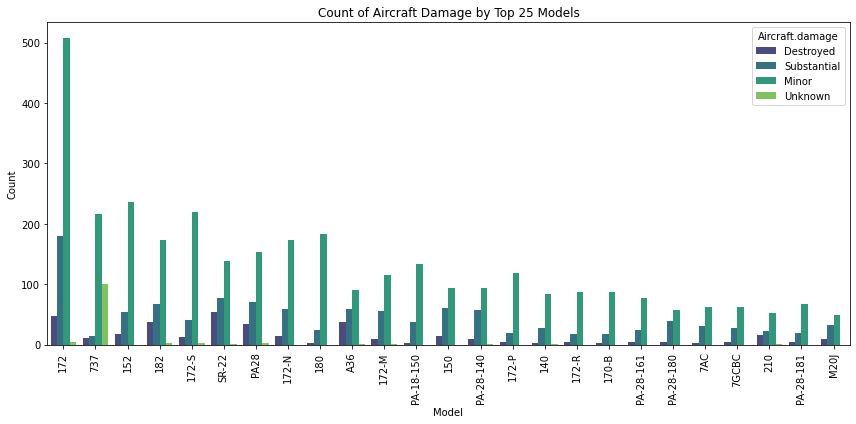

In [102]:
# Convert 'Model' column to string to avoid potential issues with plotting
df_1985['Model'] = df_1985['Model'].astype(str)

# Fill missing values in 'Aircraft.damage' column with 'Unknown'
df_1985['Aircraft.damage'].fillna('Unknown', inplace=True)

# Get the top 25 unique 'Model' values based on their counts
top_25_models = df_1985['Model'].value_counts().nlargest(25).index

# Filter the DataFrame to include only the top 25 'Model' values
df_top_25_models = df_1985[df_1985['Model'].isin(top_25_models)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's countplot to create the bar chart
sns.countplot(x='Model', hue='Aircraft.damage', data=df_top_25_models, ax=ax, palette='viridis',
              order=top_25_models)  # Specify the order of x-axis labels

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Count')
ax.set_title('Count of Aircraft Damage by Top 25 Models')

# Show the plot
plt.tight_layout()
plt.show()



In [103]:
# Filter the DataFrame to include only rows where 'Model' contains '737'
model_737_rows = df_1985[df_1985['Model'].str.contains('737', na=False)]

# Sort the resulting DataFrame by 'Total.Fatal.Injuries' in descending order
sorted_model_737_rows = model_737_rows.sort_values(by='Total.Fatal.Injuries', ascending=False)

# Display the sorted DataFrame
sorted_model_737_rows[:25]



,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model
Event.Id,,,,,,,,,,,,,,,,,,,,,
20181029X04746,Accident,DCA19RA017,2018-10-29,"Jakarta, Indonesia",Indonesia,NaN,NaN,NaN,NaN,Fatal,...,NaN,188,0,0,0.0,NaN,NaN,NaN,13-09-2021,BOEING_737
20200108X01007,Accident,DCA20RA048,2020-01-08,"Tehran, Iran (Islamic Republic of)",Iran,NaN,NaN,NaN,NaN,Fatal,...,Ukraine International Airlines,176,0,0,0.0,NaN,NaN,NaN,26-09-2020,BOEING_737
20100522X50538,Accident,DCA10RA063,2010-05-22,"Manglaore, India",India,NaN,NaN,NaN,NaN,Fatal,...,Air India Charters,158,0,7,1.0,NaN,NaN,NaN,03-11-2020,BOEING_737
20190310X63916,Accident,DCA19RA101,2019-03-10,"Addis Ababa, Ethiopia",Ethiopia,NaN,NaN,NaN,NaN,Fatal,...,Ethiopian Airlines,157,0,0,0.0,NaN,NaN,NaN,26-09-2020,BOEING_737
20061002X01435,Accident,DCA06RA076A,2006-09-29,"Azevedo, Brazil",Brazil,NaN,NaN,NaN,Cachimbo airbase,Fatal(154),...,NaN,154,NaN,NaN,7.0,IMC,NaN,Foreign,02-04-2010,BOEING_737-800
20220321104807,Accident,DCA22WA102,2022-03-21,"Wuzhou,",China,NaN,NaN,NaN,NaN,Fatal,...,China Eastern Airlines,132,0,0,0.0,NaN,NaN,NaN,23-05-2022,BOEING_737
20120427X01955,Accident,DCA12RA065,2012-04-20,"Islamabad, Pakistan",Pakistan,NaN,NaN,ISB,Islamabad Benazir Bhutto Int'l,Fatal,...,Bhoja Air,127,0,0,0.0,NaN,NaN,NaN,03-11-2020,BOEING_737
20180519X00340,Accident,DCA18RA186,2018-05-18,"Havana, Cuba",Cuba,NaN,NaN,MUHA,Havana-José Martí Internationa,Fatal,...,Cubana de Aviación,112,0,1,0.0,NaN,NaN,NaN,25-09-2020,BOEING_737
20100126X35439,Accident,DCA10RA023,2010-01-25,"Beirut, Lebanon",Lebanon,394916N,0352918E,OLBA,Rafic Hariri International,Fatal,...,Ethiopian Airlines,90,0,0,0.0,IMC,NaN,NaN,03-11-2020,BOEING_737


In [104]:
# Group the DataFrame by 'Make_Model' and calculate the sum of 'Total.Fatal.Injuries' and 'Total.Uninjured' for each 'Make_Model'
make_model_fatal_uninjured = df_1985.groupby('Make_Model')[['Total.Fatal.Injuries', 'Total.Uninjured']].sum()

# Calculate the ratio of 'Total.Fatal.Injuries' to 'Total.Uninjured' for each 'Make_Model'
make_model_fatal_uninjured['Fatal_to_Uninjured_Ratio'] = make_model_fatal_uninjured['Total.Fatal.Injuries'] / make_model_fatal_uninjured['Total.Uninjured']

# Sort the DataFrame by 'Fatal_to_Uninjured_Ratio' in descending order
sorted_make_model_ratio = make_model_fatal_uninjured.sort_values(by='Fatal_to_Uninjured_Ratio', ascending=True)

# Display the resulting DataFrame
sorted_make_model_ratio[:25]


,Total.Fatal.Injuries,Total.Uninjured,Fatal_to_Uninjured_Ratio
Make_Model,,,
2021FX3 LLC_CCX-2000,0,2.0,0.0
GRUMMAN_G164 - A,0,1.0,0.0
GRUMMAN_G164 - B,0,1.0,0.0
GRUMMAN_G164B,0,2.0,0.0
GRUMMAN_G21A,0,2.0,0.0
GRUMMAN_G44,0,2.0,0.0
GRUMMAN_TMB-3E,0,4.0,0.0
GULFSTREAM_550,0,5.0,0.0
GULFSTREAM_695A,0,2.0,0.0


# Conclusions

## Recommendations

- 1-We should target Models with more engines as the more engines on a plane, the less likely Fatal Injuries are to occur.  More Engines means the plane is larger.  We can tell by the frequency of crashes with the BOEING 737 and the amount of 'TotalUninjured' and 'Total.Fatal.Injuries' that the **BOEING 737 is one of the largest planes in our dataset. 
- 2-There is a **negative correlation between Turbo engines and Fatal Injuries** as well, indicating that Turbo Engines are much safer than Reciprocating.  BOEING and AIRBUS largely use Turbo fans and CESSNA uses Reciprocating.
- 3-Based on the data we have present and a simple review of popularity of Models, the **Cessna 172 has one of the best safety record of planes in this dataset.**  It ranks 25th in most uninjured passengers of all planes.

## Limitations

- This is only crash data, so if a plane theoretically has never crashed before, it would not be in this dataset.
- The majority of the rows were not used in final calculations due to so many NaN/missing values.
- This data is US based which limits international analysis.

## Next Steps

- Make a deeper analysis of Boeing 737 and Cessna 172.
- Analyze cost of maintenence for these 2 planes

In [105]:
#df_1985.shape

(20399, 31)

In [106]:
df_1985.to_csv('edited_aviation_dataset.csv', index=False)